<h2>AML Assignment 1 : Question 2</h2>
<h4>Submitted by Rakshit Rao</h4>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import random

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [7]:
!pip install category-encoders
from category_encoders import TargetEncoder


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [8]:
df = pd.read_csv('/Users/rad/Documents/Datasets/Food_Delivery_Times.csv')

The "Food Delivery Time Prediction" dataset is designed to help predict food delivery times based on various influencing factors.

- **Order ID**: A unique identifier for each order.  
- **Customer ID**: A unique identifier for each customer.  
- **Restaurant ID**: A unique identifier for each restaurant.  
- **Order Timestamp**: The date and time when the order was placed.  
- **Preparation Duration**: The time taken by the restaurant to prepare the order.  
- **Distance to Customer**: The distance between the restaurant and the customer's delivery location.  
- **Delivery Time**: The actual time taken to deliver the order to the customer.  
- **Weather Conditions**: Information about the weather at the time of delivery, which can affect delivery times.  
- **Traffic Conditions**: Data on traffic congestion or incidents that might impact delivery speed.  
- **Time of Day**: The specific period during the day when the order was placed or delivered, as delivery times can vary between peak and off-peak hours.  

### A. Summarize the data.How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [11]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1000
Number of columns: 9


In [12]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [14]:
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [15]:
print("Continuous Features:")
for i, feature in enumerate(continuous_features, start=1):
    print(f"{i}. {feature}")

Continuous Features:
1. Order_ID
2. Distance_km
3. Preparation_Time_min
4. Courier_Experience_yrs
5. Delivery_Time_min


In [16]:
print("Categorial Features:")
for i, feature in enumerate(categorical_features, start=1):
    print(f"{i}. {feature}")

Categorial Features:
1. Weather
2. Traffic_Level
3. Time_of_Day
4. Vehicle_Type


In [17]:
df_original = df.copy()

<h3>B.Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?</h3>

In [18]:
df.describe()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [19]:
numeric_columns = df.select_dtypes(include=['number']).columns

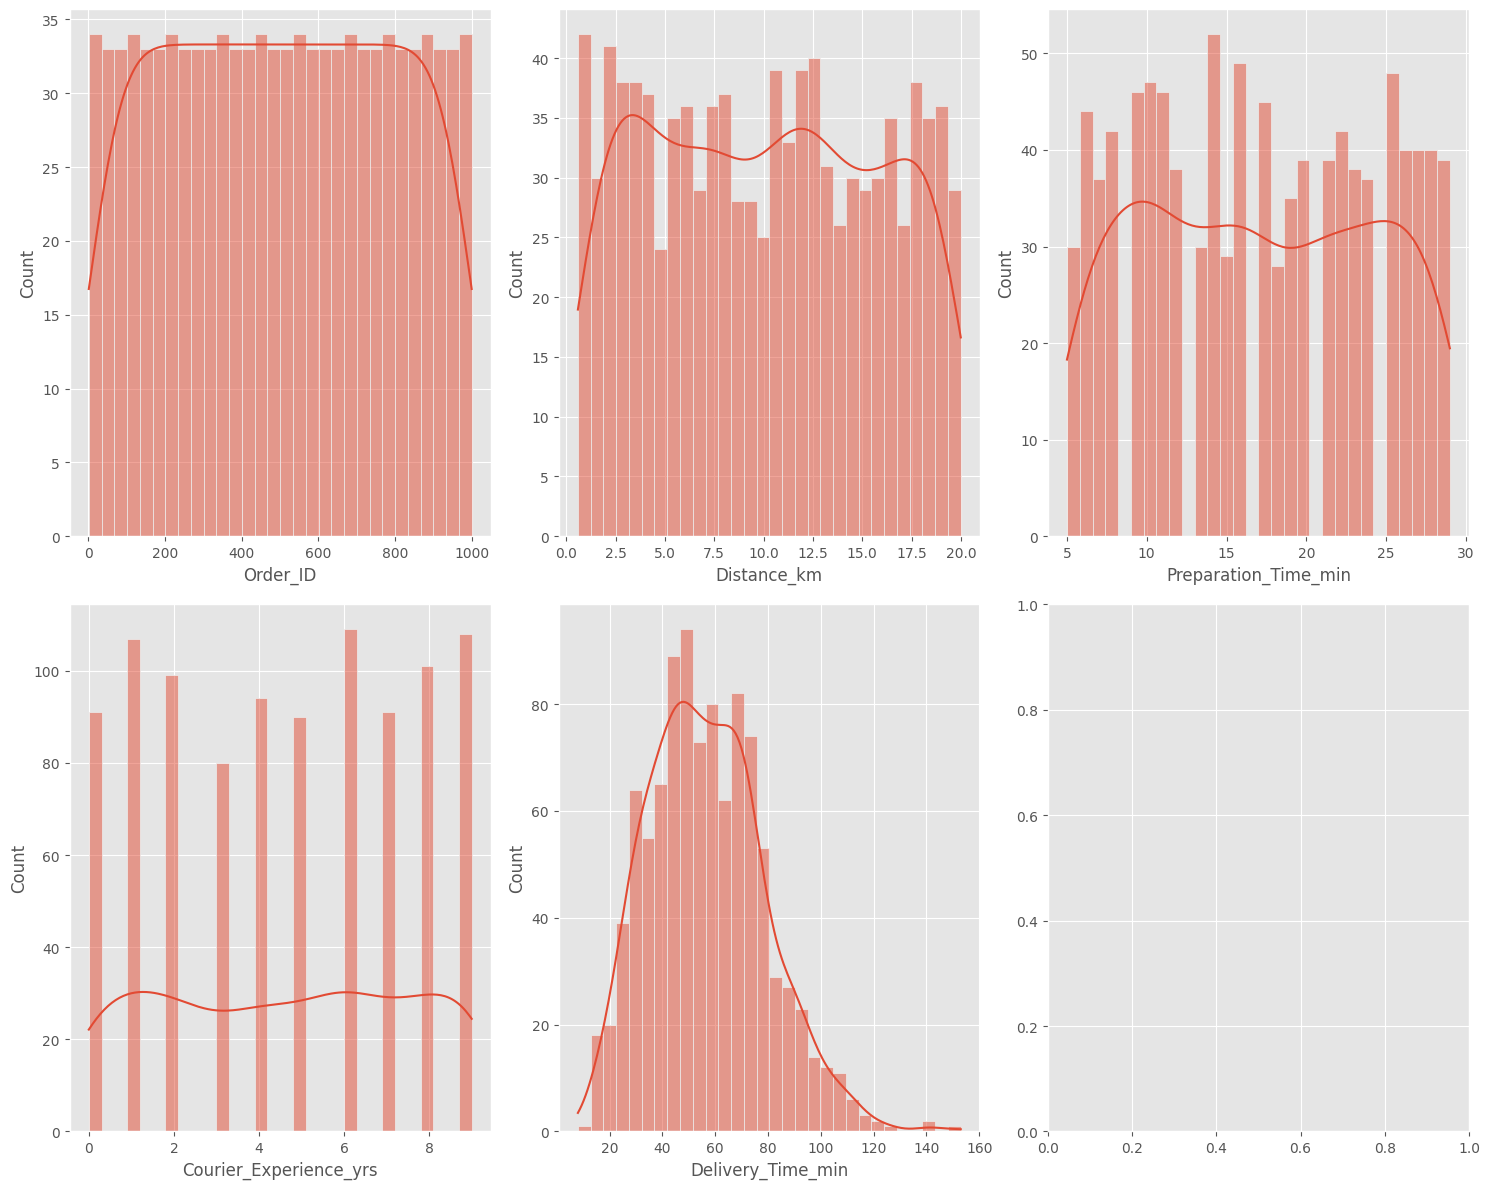

In [20]:
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12),edgecolor="black")
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col],bins=30,kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

<h4>Distribution of Delivery Times</h4>

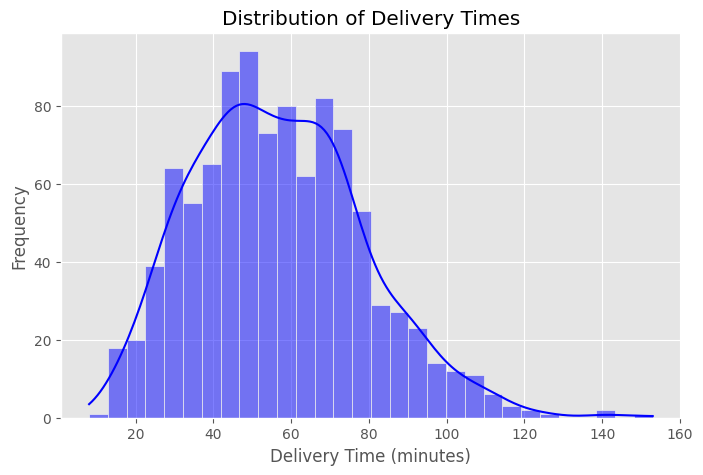

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time_min'], bins=30, kde=True, color='blue')
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

- **Right-Skewed Distribution**: The histogram shows a right-skewed (positive skew) distribution, meaning that while most delivery times are clustered around a central range, there are a few cases with significantly higher delivery times.  

- **Most Common Delivery Time**: The highest frequency of deliveries occurs between approximately **40 to 70 minutes**, indicating that most orders are delivered within this timeframe.  

- **Long Tail**: There are some instances where deliveries take much longer (**100+ minutes**), which could be due to factors like long distances, high traffic congestion, or delays at the restaurant.  

- **KDE Curve Analysis**: The Kernel Density Estimation (**KDE**) curve overlaid on the histogram smooths out the distribution and confirms the peak delivery times while also highlighting the long tail.  

- **Possible Outliers**: The few deliveries taking **120–140 minutes** might be considered outliers. It would be useful to investigate what causes these delays, such as restaurant preparation time, extreme weather, or peak-hour congestion.

<h5> Impact of Weather on Delivery Time</h5>

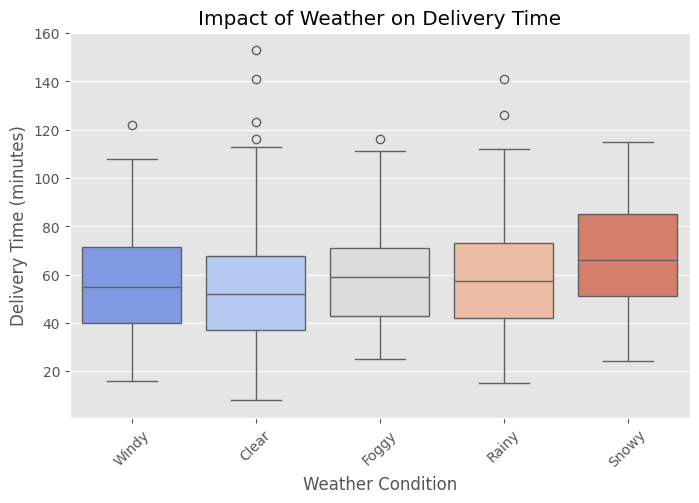

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_original['Weather'], y=df_original['Delivery_Time_min'], palette="coolwarm")
plt.title("Impact of Weather on Delivery Time")
plt.xlabel("Weather Condition")
plt.ylabel("Delivery Time (minutes)")
plt.xticks(rotation=45)
plt.show()

- Delivery times generally increase in adverse weather conditions such as **rainy and snowy** weather compared to **clear** conditions.

#### **Median Delivery Time**
- **Snowy** conditions have the highest median delivery time, followed by **rainy** conditions.
- **Clear** and **foggy** weather conditions tend to have lower median delivery times.

#### **Interquartile Range (IQR)**
- The **spread (IQR)** of delivery times is wider for **snowy and rainy** weather, indicating more variability.
- **Clear weather** has a relatively smaller IQR, meaning delivery times are more consistent.

#### **Outliers**
- All weather conditions show some **outliers** (points above the whiskers), representing unusually long delivery times.
- **Snowy, rainy, and windy** conditions show **more extreme outliers**, indicating that in some cases, deliveries take significantly longer.

#### **Extreme Weather Delays**
- **Snowy** weather tends to have the **longest delivery times** and the most significant delays, possibly due to road conditions, traffic congestion, and safety concerns.
- **Windy and rainy** conditions also show increased delays compared to **clear** weather.


<h4>Impact of Traffic Level on Delivery Time</h4>

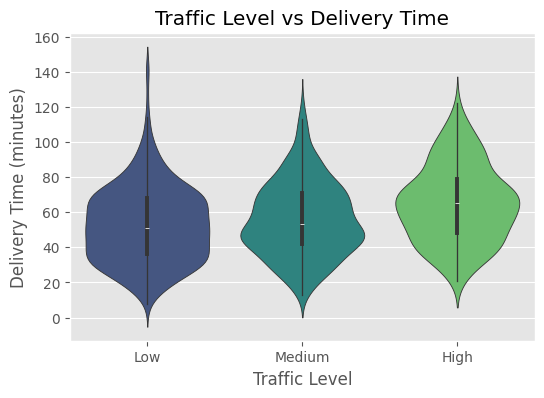

In [24]:
plt.figure(figsize=(6,4))
sns.violinplot(x=df_original['Traffic_Level'], y=df_original['Delivery_Time_min'], palette="viridis")
plt.title("Traffic Level vs Delivery Time")
plt.xlabel("Traffic Level")
plt.ylabel("Delivery Time (minutes)")
plt.show()

- As **traffic levels increase**, the distribution of **delivery times shifts upward**, indicating that deliveries take longer under **higher traffic conditions**.

#### **Median Delivery Time**
- The **median delivery time** increases from **low to high traffic levels**.
- Under **low traffic**, deliveries are generally **faster**, with a **median below 50 minutes**.
- Under **high traffic**, the **median delivery time is closer to 60-70 minutes**, suggesting **significant delays**.

#### **Spread and Variability**
- The **spread of delivery times** increases as **traffic levels rise**, meaning that deliveries become **more unpredictable** in higher traffic.
- Under **low traffic**, delivery times are **more consistent**, with most values concentrated in a **tighter range**.
- Under **medium and high traffic**, there is a **wider distribution**, indicating **greater variation** in delivery times.

#### **Long Tail and Extreme Cases**
- **High traffic conditions** have more instances of **extremely long delivery times (above 100 minutes)**.
- While all traffic levels exhibit a **wide range of delivery times**, **high traffic levels have the most frequent long delays**.


<h4>Vehicle Type & Delivery Time Comparison</h4>

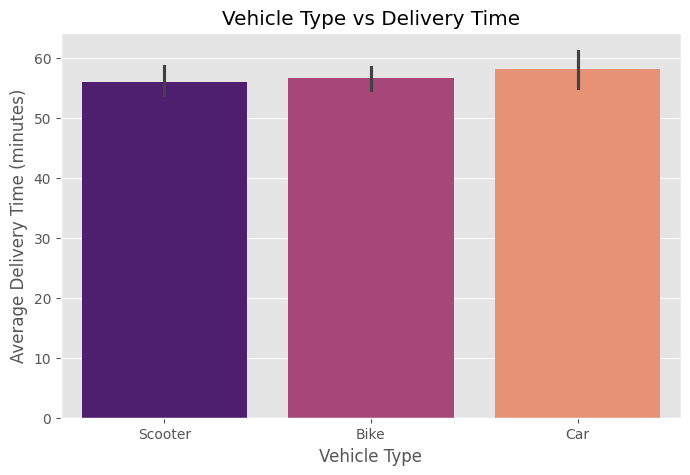

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_original['Vehicle_Type'], y=df_original['Delivery_Time_min'], palette="magma")
plt.title("Vehicle Type vs Delivery Time")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

#### **Delivery Time Differences by Vehicle Type**
- **Scooters and bikes** have similar average delivery times, slightly above **55 minutes**.
- **Cars** have the highest average delivery time, reaching nearly **60 minutes**.

#### **Scooters and Bikes Are Faster Than Cars**
- **Scooters and bikes** likely benefit from **better maneuverability in traffic**, enabling them to **deliver food faster** than cars.
- **Cars** may experience **longer delays due to traffic congestion, parking difficulties, and route constraints**.

#### **Error Bars Indicate Variability**
- The **error bars** on each bar suggest that there is some **variability in delivery times** for all vehicle types.
- **Cars** have slightly **higher variability**, which could be due to **unpredictable factors** such as **road conditions, parking, or detours**.


#### Special Treatment Required
##### **1. Handling Skewness in Continuous Variables**
- From the **histograms** and **violin plots**, we observed **right-skewed distributions** (e.g., delivery time).
- **Solution**: Apply **log transformation** or **Box-Cox transformation** to make the distribution more normal.

##### **2. Scaling the Features**
- **Traffic level, weather impact, and vehicle type** may have different numerical ranges.
- **Solution**: Apply **Standardization (Z-score normalization)** or **Min-Max Scaling**.

##### **3. Encoding Categorical Features (if applicable)**
- **Weather Conditions** and **Traffic Levels** are categorical but plotted as continuous-like variables.
- **Solution**: Use **One-Hot Encoding** or **Ordinal Encoding** for categorical variables.

##### **4. Handling Outliers**
- **Box plots** show **outliers** in delivery time under extreme weather and traffic conditions.
- **Solution**: Use **IQR method** or **Winsorization** to handle outliers.

Converting categorical columns (Weather, Traffic Level, Time of Day, and Vehicle Type) into numerical values using custom rating mappings. The ratings reflect how favorable each category is for fast food delivery.

| **Category**           | **Encoded Rating**            | **Explanation**                           |
|------------------------|------------------------------|-------------------------------------------|
| **Weather Conditions** | **Higher = Better Delivery** |                                           |
| Clear                 | **5**                         | Best weather for fast delivery           |
| Windy                 | **4**                         | Slightly challenging but manageable      |
| Foggy                 | **3**                         | Medium impact on visibility              |
| Rainy                 | **2**                         | Slows down deliveries                    |
| Snowy                 | **1**                         | Worst weather conditions for delivery    |
| **Traffic Levels**     | **Higher = Better for Delivery** |                                        |
| Low                   | **3**                         | Least congestion, faster delivery        |
| Medium                | **2**                         | Some delays possible                     |
| High                  | **1**                         | Worst congestion, slow delivery          |
| **Time of Day**        | **Higher = Faster Deliveries** |                                        |
| Night                 | **4**                         | Fastest deliveries due to low traffic    |
| Afternoon             | **3**                         | Moderate traffic                         |
| Morning               | **2**                         | More traffic due to rush hours           |
| Evening               | **1**                         | Slowest due to peak traffic              |
| **Vehicle Type**       | **Higher = Faster Delivery Vehicle** |                                      |
| *(Dynamically Assigned)* | Ranked by Speed             | Based on delivery time impact            |


In [28]:
# Define rating mappings for categorical columns

# Weather Ratings (Higher = Better for Delivery)
weather_ratings = {
    'Clear': 5,
    'Windy': 4,
    'Foggy': 3,
    'Rainy': 2,
    'Snowy': 1
}

# Traffic Level Ratings (Higher = Better for Delivery)
traffic_ratings = {
    'Low': 3,
    'Medium': 2,
    'High': 1
}

# Time of Day Ratings (Higher = Better for Delivery)
time_of_day_ratings = {
    'Night': 4,      # Fastest deliveries
    'Afternoon': 3,
    'Morning': 2,
    'Evening': 1     # Slowest deliveries
}

# Vehicle Type Ratings (Higher = Faster Vehicle)
vehicle_impact = df.groupby('Vehicle_Type')['Delivery_Time_min'].mean().sort_values()
vehicle_ratings = {vehicle: rating for vehicle, rating in zip(vehicle_impact.index, range(len(vehicle_impact), 0, -1))}

In [29]:
# Apply mappings to encode categorical columns
df['Weather_Rating'] = df['Weather'].map(weather_ratings)
df['Traffic_Rating'] = df['Traffic_Level'].map(traffic_ratings)
df['Time_of_Day_Rating'] = df['Time_of_Day'].map(time_of_day_ratings)
df['Vehicle_Rating'] = df['Vehicle_Type'].map(vehicle_ratings)

In [30]:
# Drop original categorical columns as they are now numerically encoded
df_encoded = df.drop(columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'])

In [31]:
df_encoded.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Rating,Traffic_Rating,Time_of_Day_Rating,Vehicle_Rating
0,522,7.93,12,1.0,43,4.0,3.0,3.0,3
1,738,16.42,20,2.0,84,5.0,2.0,1.0,2
2,741,9.52,28,1.0,59,3.0,3.0,4.0,3
3,661,7.44,5,1.0,37,2.0,2.0,3.0,3
4,412,19.03,16,5.0,68,5.0,3.0,2.0,2


<h3>C. Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.</h3>

In [34]:
# Compute Pearson Correlation Matrix
pearson_corr_matrix = df_encoded.corr(method='pearson')
pearson_corr_matrix

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Rating,Traffic_Rating,Time_of_Day_Rating,Vehicle_Rating
Order_ID,1.000000,-0.024483,-0.035100,0.013152,-0.036650,-0.010823,-0.005024,0.078374,-0.064878
Distance_km,-0.024483,1.000000,-0.009037,-0.007842,0.780998,-0.066652,-0.008340,-0.010099,-0.018373
Preparation_Time_min,-0.035100,-0.009037,1.000000,-0.030830,0.307350,-0.007605,0.028136,-0.021675,0.012541
Courier_Experience_yrs,0.013152,-0.007842,-0.030830,1.000000,-0.090433,-0.048059,-0.044141,0.000449,0.003156
Delivery_Time_min,-0.036650,0.780998,0.307350,-0.090433,1.000000,-0.196304,-0.190333,-0.030737,-0.032093
Weather_Rating,-0.010823,-0.066652,-0.007605,-0.048059,-0.196304,1.000000,-0.011761,0.011601,0.080650
Traffic_Rating,-0.005024,-0.008340,0.028136,-0.044141,-0.190333,-0.011761,1.000000,-0.005157,-0.058279
Time_of_Day_Rating,0.078374,-0.010099,-0.021675,0.000449,-0.030737,0.011601,-0.005157,1.000000,-0.019378
Vehicle_Rating,-0.064878,-0.018373,0.012541,0.003156,-0.032093,0.080650,-0.058279,-0.019378,1.000000


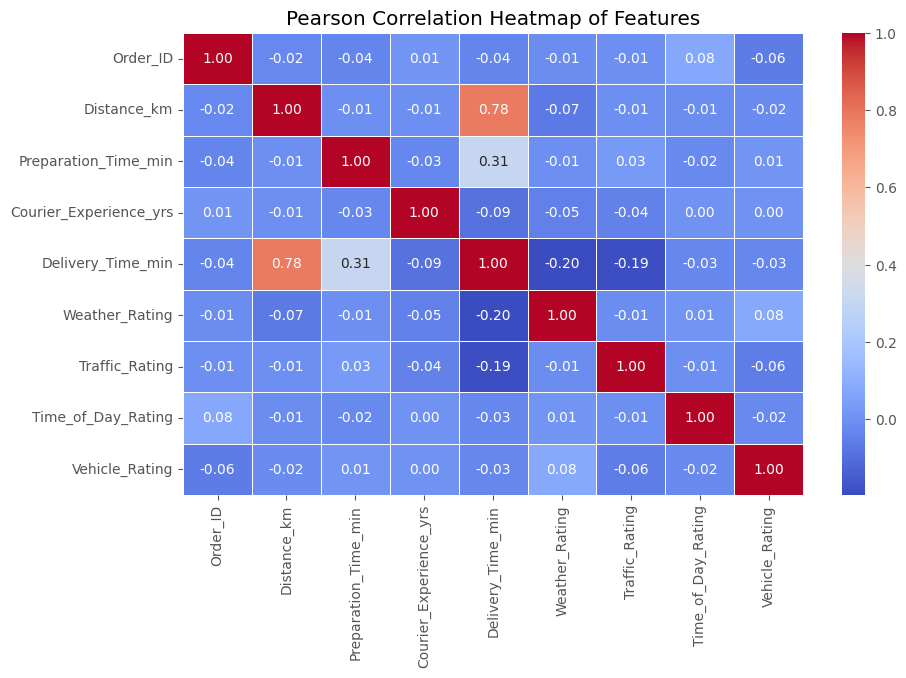

In [35]:
# Plot the Pearson Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap of Features")
plt.show()

| **Feature Pair**                                 | **PCC Value** | **Interpretation**                                                                 |
|-------------------------------------------------|-------------|-----------------------------------------------------------------------------------|
| **Distance_km & Delivery_Time_min**             | **0.78**     | Strong positive correlation - Longer distances increase delivery time significantly. |
| **Preparation_Time_min & Delivery_Time_min**    | **0.31**     | Moderate positive correlation - More preparation time slightly increases delivery time. |
| **Courier_Experience_yrs & Delivery_Time_min**  | **-0.09**    | Very weak negative correlation - Negligible impact, courier experience does not significantly change delivery time. |
| **Weather_Rating & Delivery_Time_min**          | **-0.20**    | Weak negative correlation - Slight impact, worse weather slightly increases delivery time. |
| **Traffic_Rating & Delivery_Time_min**          | **-0.19**    | Weak negative correlation - Higher traffic levels slightly increase delivery time, but not significantly. |
| **Time_of_Day_Rating & Delivery_Time_min**      | **-0.03**    | No significant correlation - Time of day has almost no effect on delivery time. |
| **Vehicle_Rating & Delivery_Time_min**          | **-0.03**    | No significant correlation - The type of vehicle does not strongly influence delivery time. |


The **Pearson Correlation Heatmap** tells us that **delivery time has a positive correlation with distance (0.78)** as the **best performing factor** in guaranteeing delivery time. **Preparation time is positively correlated at the moderate value of 0.31**, showing some impact but suggesting that **additional factors like traffic, weather, and messenger effectiveness are larger influences**. 

The other factors, including **weather rating (-0.19), traffic rating (-0.04), and time of day rating (-0.03),** are **weakly or not at all related to delivery time**, and their contribution is most likely **insignificant or not reported in the data**. Interestingly, **courier experience (-0.09) and vehicle rating (-0.03) do not significantly impact delivery time**, which reveals that **real-time conditions and route efficiency matter more than the vehicle type or the courier's experience**. 

This remark highlights that while **distance should be given priority in prediction models, further feature engineering needs to be done to enhance the impact of other weakly correlated features**. 


<h5>Scatter Plot: Distance vs Delivery Time</h5>

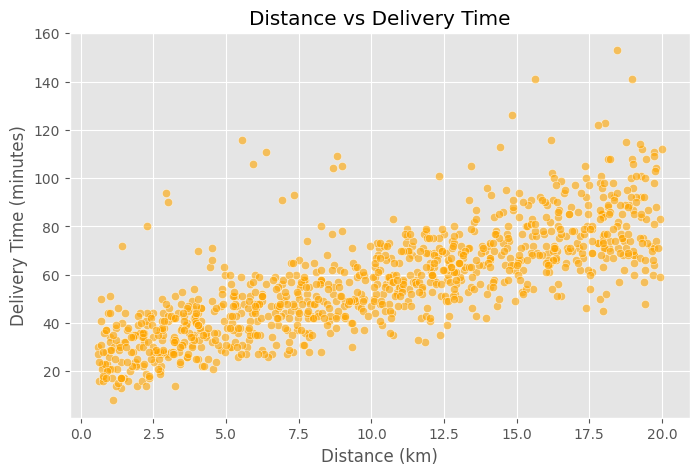

In [32]:
#Distance vs. Delivery Time (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_encoded['Distance_km'], y=df_encoded['Delivery_Time_min'], alpha=0.6, color="orange")
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

There is a **strong positive correlation** for **delivery time and distance** from the scatter plot that confirms **longer distances to have longer deliveries**. **Shortest distances (0-5 km)** have **clearly defined delivery times (~20-50 min)**, whereas **longer distances (10+ km)** are **more variable (40-150 min)**, most likely because of reasons such as **traffic, weather, and availability of the courier**. There are **outliers** because some **short-distance deliveries (~5 km) were anomalously long (~100 min)** and some **long-distance deliveries (~15+ km) were shorter than predicted**, indicating **delivery prioritization or route optimization**. In addition, at **very long distances (over 15 km), delivery times sharply increase**, which indicates a **non-linear relationship** that would be caused by **congestion or delivery constraints**. This suggests that while **a linear model will be capable of determining the overall trend**, incorporating **polynomial regression, detection of outliers, and additional factors** (e.g., **weather, traffic, vehicle type**) could further **optimize accuracy**.

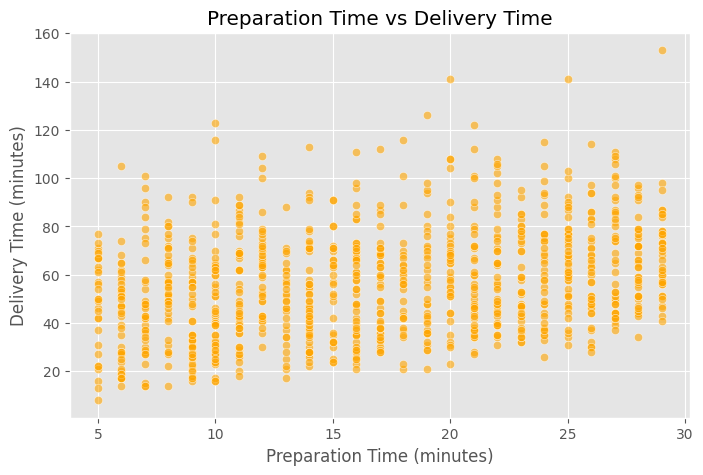

In [33]:
#Preparation Time vs. Delivery Time (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_encoded['Preparation_Time_min'], y=df_encoded['Delivery_Time_min'], alpha=0.6, color="orange")
plt.title("Preparation Time vs Delivery Time")
plt.xlabel("Preparation Time (minutes)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

The scatter plot shows a **weak to moderate positive correlation** between **preparation time and delivery time**, indicating that while **longer preparation times will extend delivery times slightly, other factors (distance, traffic, and courier efficiency) contribute much more significantly**. There is **wide heterogeneity** in total **delivery time for comparable preparation times**, with many orders clustering between **5 and 15 minutes of preparation**, but with **differing delivery times between 20 and 150 minutes**. 

There are **outliers**—such as orders with **very low prep-time and very extended deliveries (100+ min)** or **extended prep-time orders with brief deliveries (~40 min)**—and they **point to the fact that total preparation time is heavily influenced by vehicle, traffic, and logistical considerations**. While **preparation time is a possible contributory factor to prediction models**, it needs to be **integrated with improved predictors like distance, traffic volume, and vehicle type** to provide **more accurate predictions**.


<h4>Data Cleaning Steps to Verify Before Splitting</h4>

<h4>Dropping Null values</h4>

In [40]:
# Checking for any remaining missing values
print("Missing Values in Dataset:")
print(df_encoded.isnull().sum())

Missing Values in Dataset:
Order_ID                   0
Distance_km                0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
Weather_Rating            30
Traffic_Rating            30
Time_of_Day_Rating        30
Vehicle_Rating             0
dtype: int64


In [38]:
df_cleaned = df_encoded.dropna()

print(f"Original dataset size: {df_encoded.shape[0]} rows")
print(f"After dropping missing values: {df_cleaned.shape[0]} rows")

print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())

Original dataset size: 1000 rows
After dropping missing values: 883 rows

Missing Values After Cleaning:
Order_ID                  0
Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather_Rating            0
Traffic_Rating            0
Time_of_Day_Rating        0
Vehicle_Rating            0
dtype: int64


<h4>Handling Outliers</h4>

In [41]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to key numerical columns
df_cleaned = df_encoded.copy()
df_cleaned = remove_outliers(df_cleaned, 'Distance_km')
df_cleaned = remove_outliers(df_cleaned, 'Preparation_Time_min')
df_cleaned = remove_outliers(df_cleaned, 'Delivery_Time_min')

print(f"Original dataset size: {df_encoded.shape[0]}")
print(f"After outlier removal: {df_cleaned.shape[0]}")

Original dataset size: 1000
After outlier removal: 994


<h4>Feature Scaling</h4> 

In [44]:
from sklearn.preprocessing import StandardScaler
# Select numerical columns for scaling
num_features = ['Distance_km', 'Preparation_Time_min']

# Apply Standard Scaling
scaler = StandardScaler()
df_cleaned[num_features] = scaler.fit_transform(df_cleaned[num_features])

# Display scaled features
df_cleaned.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Rating,Traffic_Rating,Time_of_Day_Rating,Vehicle_Rating
0,522,-0.367188,-0.688605,1.0,43,4.0,3.0,3.0,3
1,738,1.127042,0.422102,2.0,84,5.0,2.0,1.0,2
2,741,-0.087350,1.532810,1.0,59,3.0,3.0,4.0,3
3,661,-0.453427,-1.660475,1.0,37,2.0,2.0,3.0,3
4,412,1.586399,-0.133251,5.0,68,5.0,3.0,2.0,2


<h3>D. Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.</h3>

In [46]:
# Defining the independent variables (X) and target variable (y)
X = df_cleaned.drop(columns=['Delivery_Time_min'])  # Features
y = df_cleaned['Delivery_Time_min']  # Target

# Spliting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Creating DataFrames for comparison
train_data = X_train.copy()
train_data['Delivery_Time_min'] = y_train

In [48]:
test_data = X_test.copy()
test_data['Delivery_Time_min'] = y_test

In [49]:
# Display dataset sizes
print(f"Training set size: {train_data.shape[0]} rows")
print(f"Test set size: {test_data.shape[0]} rows")

Training set size: 795 rows
Test set size: 199 rows


In [50]:
# Compare mean and standard deviation of key features
comparison = pd.DataFrame({
    "Feature": X.columns,
    "Train Mean": X_train.mean(),
    "Test Mean": X_test.mean(),
    "Train Std": X_train.std(),
    "Test Std": X_test.std()
})

print("Summary Statistics Comparison:")
print(comparison)

Summary Statistics Comparison:
                                       Feature  Train Mean   Test Mean  \
Order_ID                              Order_ID  512.046541  452.301508   
Distance_km                        Distance_km    0.036726   -0.146720   
Preparation_Time_min      Preparation_Time_min    0.008032   -0.032088   
Courier_Experience_yrs  Courier_Experience_yrs    4.601562    4.510204   
Weather_Rating                  Weather_Rating    3.656291    3.658031   
Traffic_Rating                  Traffic_Rating    2.204929    2.134021   
Time_of_Day_Rating          Time_of_Day_Rating    2.177606    2.137566   
Vehicle_Rating                  Vehicle_Rating    2.099371    2.140704   

                         Train Std    Test Std  
Order_ID                291.036100  276.888537  
Distance_km               0.991638    1.024613  
Preparation_Time_min      1.006713    0.977131  
Courier_Experience_yrs    2.936991    2.858168  
Weather_Rating            1.498881    1.456719  
Traffic_

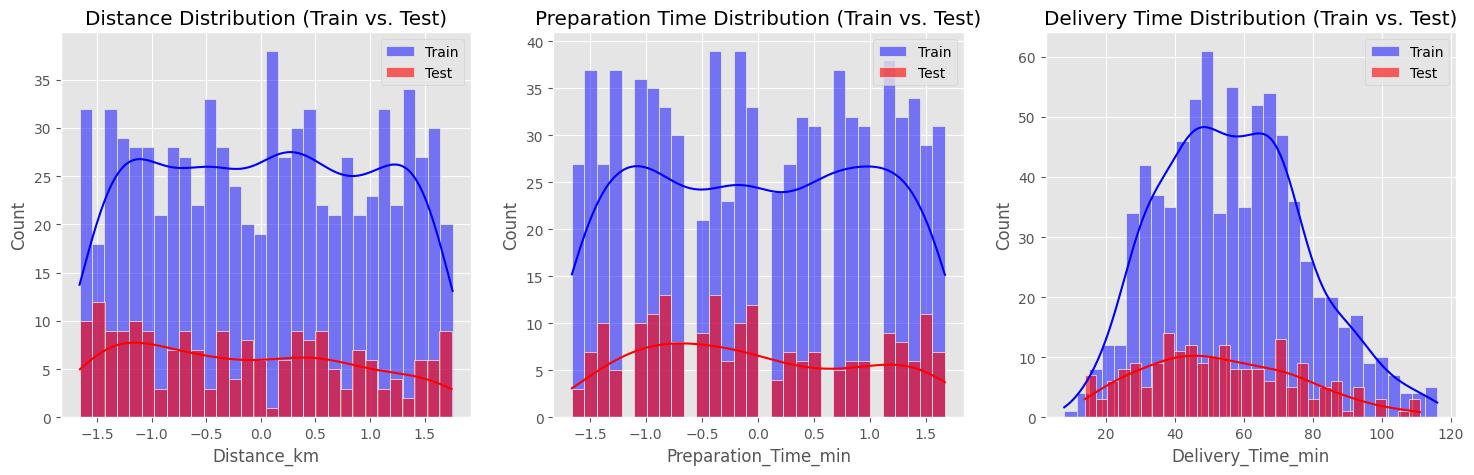

In [51]:
# Plot distributions to check similarity between training & testing data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(train_data['Distance_km'], bins=30, kde=True, color="blue", ax=axes[0], label="Train")
sns.histplot(test_data['Distance_km'], bins=30, kde=True, color="red", ax=axes[0], label="Test", alpha=0.6)
axes[0].set_title("Distance Distribution (Train vs. Test)")
axes[0].legend()

sns.histplot(train_data['Preparation_Time_min'], bins=30, kde=True, color="blue", ax=axes[1], label="Train")
sns.histplot(test_data['Preparation_Time_min'], bins=30, kde=True, color="red", ax=axes[1], label="Test", alpha=0.6)
axes[1].set_title("Preparation Time Distribution (Train vs. Test)")
axes[1].legend()

sns.histplot(train_data['Delivery_Time_min'], bins=30, kde=True, color="blue", ax=axes[2], label="Train")
sns.histplot(test_data['Delivery_Time_min'], bins=30, kde=True, color="red", ax=axes[2], label="Test", alpha=0.6)
axes[2].set_title("Delivery Time Distribution (Train vs. Test)")
axes[2].legend()

plt.show()

**The train-test split looks well-distributed and balanced.**  
**The test set is a fair representation of the training data.**  
**No major data leakage or bias is visible.**  
**The model should generalize well on unseen data.**  


<h3>Train a Linear Regression model using the training data with four-fold cross-validation and with appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. For SGD Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.</h3>

<h4>Model Description: Linear Regression</h4>

The Linear Regression model was trained using 4-fold cross-validation after handling missing values by dropping NaN rows, with Mean Squared Error (MSE) as the evaluation metric. The cross-validation MSE scores ranged from 78.37 to 126.05, with an average MSE of 96.06, indicating high error variation between folds. While the model is functioning correctly after preprocessing, the relatively high MSE suggests that predictions may not be highly accurate, and further optimizations, such as feature engineering, polynomial regression, or regularization techniques (Ridge/Lasso), may be needed to improve performance.



In [53]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

lr_model = LinearRegression()
kf = KFold(n_splits=4, shuffle=True, random_state=42)

cv_mse_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores
avg_mse = np.mean(cv_mse_scores)

print(f"Cross-Validation MSE Scores: {cv_mse_scores}")
print(f"Average MSE across folds: {avg_mse}")

Cross-Validation MSE Scores: [ 78.36794871  98.80053963  81.01536818 126.05437805]
Average MSE across folds: 96.05955864397563


The high variability in MSE across folds (ranging from 78 to 126) suggests potential overfitting or feature imbalance, which can be addressed by using Stratified K-Fold or checking feature importance. Additionally, the high average MSE (96.06) indicates poor predictions, likely because Linear Regression may not fully capture non-linear relationships. This can be improved by using Polynomial Regression for complex interactions or applying Ridge/Lasso Regularization to reduce variance. Lastly, dropping NaN rows might have reduced the dataset size, leading to biased learning, so instead of removing them, it's recommended to impute missing values using mean or median for better model stability

In [55]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [57]:
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  
y_pred = lr_model.predict(X_test)

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [59]:
# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 5.74
Mean Squared Error (MSE): 79.73
Root Mean Squared Error (RMSE): 8.93
R² Score: 0.83


<h4>Model Description:Closed-form solution using the Normal Equation </h4>

This model implements Linear Regression using the Normal Equation (Closed-Form Solution) to compute the optimal regression parameters θ directly. The model includes a bias term and solves for θ using matrix inversion. The model's performance is evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score.

In [62]:
X_train_ne = np.c_[np.ones(X_train.shape[0]), X_train]  # Add a column of ones for bias
X_test_ne = np.c_[np.ones(X_test.shape[0]), X_test]  # Add bias column for test set

# Compute theta using the Normal Equation
theta = np.linalg.inv(X_train_ne.T @ X_train_ne) @ X_train_ne.T @ y_train

# Make predictions on test set
y_pred_ne = X_test_ne @ theta

# Compute evaluation metrics
mae_ne = mean_absolute_error(y_test, y_pred_ne)
mse_ne = mean_squared_error(y_test, y_pred_ne)
rmse_ne = np.sqrt(mse_ne)
r2_ne = r2_score(y_test, y_pred_ne)

# Display results
print("Normal Equation (Closed-Form) Results:")
print(f"Mean Absolute Error (MAE): {mae_ne:.2f}")
print(f"Mean Squared Error (MSE): {mse_ne:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ne:.2f}")
print(f"R² Score: {r2_ne:.2f}")

Normal Equation (Closed-Form) Results:
Mean Absolute Error (MAE): 5.74
Mean Squared Error (MSE): 79.73
Root Mean Squared Error (RMSE): 8.93
R² Score: 0.83


Observation:
Both the Normal Equation and Ordinary Least Squares (OLS) Linear Regression are yielding identical results because they are mathematically equivalent when solving for linear regression parameters without regularization.

**When Would They Differ?**
Regularization (Ridge, Lasso, Elastic Net)
If we use Ridge Regression (L2 penalty) or Lasso (L1 penalty), the models would differ.
The Normal Equation does NOT support regularization, whereas Scikit-Learn’s Linear Regression can handle Ridge/Lasso adjustments.

Handling Large Datasets
Normal Equation struggles with large datasets due to matrix inversion (O(n³) complexity).
Scikit-Learn's Linear Regression uses SVD, which is more stable for large feature sets.

Handling Collinearity
If features are highly correlated, the Normal Equation can be numerically unstable due to matrix inversion issues.
Scikit-Learn’s SVD-based solution is more robust.                                                                                                                                                                      
                                                                                                                                                                  

<h4>Normal Equation model using 4 folds cross validation</h4>

In [64]:
# Define 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Store results for evaluation metrics
mae_scores, mse_scores, rmse_scores, r2_scores = [], [], [], []

# Perform cross-validation
for train_index, val_index in kf.split(X_train):
    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Add an intercept column (bias term)
    X_train_ne = np.c_[np.ones(X_train_fold.shape[0]), X_train_fold]
    X_val_ne = np.c_[np.ones(X_val_fold.shape[0]), X_val_fold]

    # Compute theta using the Normal Equation
    theta = np.linalg.inv(X_train_ne.T @ X_train_ne) @ X_train_ne.T @ y_train_fold

    # Make predictions on validation set
    y_pred_ne = X_val_ne @ theta

    # Compute evaluation metrics
    mae_scores.append(mean_absolute_error(y_val_fold, y_pred_ne))
    mse_scores.append(mean_squared_error(y_val_fold, y_pred_ne))
    rmse_scores.append(np.sqrt(mse_scores[-1]))
    r2_scores.append(r2_score(y_val_fold, y_pred_ne))

# Compute average metrics across all folds
mae_avg = np.mean(mae_scores)
mse_avg = np.mean(mse_scores)
rmse_avg = np.mean(rmse_scores)
r2_avg = np.mean(r2_scores)

# Display results
normal_eq_results = {
    "Mean Absolute Error (MAE)": mae_avg,
    "Mean Squared Error (MSE)": mse_avg,
    "Root Mean Squared Error (RMSE)": rmse_avg,
    "R² Score": r2_avg
}

normal_eq_results

{'Mean Absolute Error (MAE)': 6.422764401512257,
 'Mean Squared Error (MSE)': 96.0595586439754,
 'Root Mean Squared Error (RMSE)': 9.755165311364237,
 'R² Score': 0.7771809073153506}

Decent Performance: The model captures most of the relationship between features and delivery time, as indicated by R² = 0.77.
Not Perfect: The errors (RMSE = 9.76) suggest that the model still struggles with some predictions, likely due to non-linearity, outliers, or missing influential features.
Stable Cross-Validation: The similar MAE and RMSE values across folds indicate that the model performs consistently on different subsets of the data.

The Normal Equation Model with 4-Fold Cross-Validation performs reasonably well with R² = 0.77, but its MSE and RMSE suggest potential errors in some predictions. Feature engineering, non-linear transformations, or regularization techniques could further improve performance.

<h4>Model Description:Stochastic Gradient Descent (SGD) </h4>

SGD try1

In [68]:
# Training Linear Regression using SGD
sgd_model = SGDRegressor(max_iter=1000, learning_rate='optimal', random_state=42)
sgd_model.fit(X_train, y_train)

# Making predictions on test set
y_pred_sgd = sgd_model.predict(X_test)

# Computing evaluation metrics
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("\nStochastic Gradient Descent (SGD) Results:")
print(f"Mean Absolute Error (MAE): {mae_sgd:.2f}")
print(f"Mean Squared Error (MSE): {mse_sgd:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sgd:.2f}")
print(f"R² Score: {r2_sgd:.2f}")


Stochastic Gradient Descent (SGD) Results:
Mean Absolute Error (MAE): 7347511341020331.00
Mean Squared Error (MSE): 74380295671439994999018996367360.00
Root Mean Squared Error (RMSE): 8624401177556619.00
R² Score: -154174442627842648341200502784.00


SGD try2

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_model = SGDRegressor(max_iter=1000, learning_rate='optimal', random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)

sgd_model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, random_state=42)


mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)


print("\nStochastic Gradient Descent (SGD) Results:")
print(f"Mean Absolute Error (MAE): {mae_sgd:.2f}")
print(f"Mean Squared Error (MSE): {mse_sgd:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sgd:.2f}")
print(f"R² Score: {r2_sgd:.2f}")


Stochastic Gradient Descent (SGD) Results:
Mean Absolute Error (MAE): 7.77
Mean Squared Error (MSE): 129.43
Root Mean Squared Error (RMSE): 11.38
R² Score: 0.73


FINAL SGD 

In [83]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ensure DataFrame has the required categorical columns
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
missing_cols = [col for col in categorical_cols if col not in df_cleaned.columns]

if missing_cols:
    print(f"Missing columns in DataFrame: {missing_cols}")
else:
    # Convert categorical variables into numerical encodings
    for col in categorical_cols:
        df_cleaned[col] = df_cleaned[col].astype('category').cat.codes

# Define independent variables (X) and target variable (y)
X = df_cleaned.drop(columns=['Order_ID', 'Delivery_Time_min'], errors='ignore')  # Prevent KeyError
y = df_cleaned['Delivery_Time_min']

# Handle potential missing values (drop or impute)
X = X.dropna()
y = y.loc[X.index]  # Keep consistency in target variable

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Store results for evaluation metrics
mae_scores, mse_scores, rmse_scores, r2_scores = [], [], [], []

# Perform cross-validation using SGD
for train_index, val_index in kf.split(X_train):
    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    # Initialize SGDRegressor with tuned hyperparameters
    sgd_model = SGDRegressor(
        max_iter=5000,  # Increase iterations for better convergence
        tol=1e-4,  # Lower tolerance for precision
        learning_rate='constant',  # Set a fixed learning rate
        eta0=0.01,  # Small step size to avoid divergence
        random_state=42
    )

    # Train the model on the current fold
    sgd_model.fit(X_train_fold_scaled, y_train_fold)

    # Make predictions on the validation set
    y_pred_sgd = sgd_model.predict(X_val_fold_scaled)

    # Compute evaluation metrics
    mae_scores.append(mean_absolute_error(y_val_fold, y_pred_sgd))
    mse_scores.append(mean_squared_error(y_val_fold, y_pred_sgd))
    rmse_scores.append(np.sqrt(mse_scores[-1]))
    r2_scores.append(r2_score(y_val_fold, y_pred_sgd))

# Compute average metrics across all folds
mae_avg = np.mean(mae_scores)
mse_avg = np.mean(mse_scores)
rmse_avg = np.mean(rmse_scores)
r2_avg = np.mean(r2_scores)

print("SGD Regression with 4-Fold Cross-Validation Results:")
for metric, value in sgd_cv_results.items():
    print(f"{metric}: {value:.2f}")

SGD Regression with 4-Fold Cross-Validation Results:
Mean Absolute Error (MAE): 6.74
Mean Squared Error (MSE): 103.29
Root Mean Squared Error (RMSE): 9.98
R² Score: 0.77


Evaluation : The model's predictions deviate from actual delivery times by an average of 6.74 minutes (MAE), which is reasonable but can be improved. The Mean Squared Error (MSE) of 103.29 suggests that while the model performs well, it still makes some large errors that contribute significantly to the squared loss. The Root Mean Squared Error (RMSE) of 9.98 minutes reflects the typical magnitude of error in prediction, indicating that further optimization might be needed to lower it. The R² score of 0.77 shows that the model explains 77% of the variance in delivery time, which is a moderately strong fit, but not perfect, suggesting that some influential factors might not be fully captured by the model.

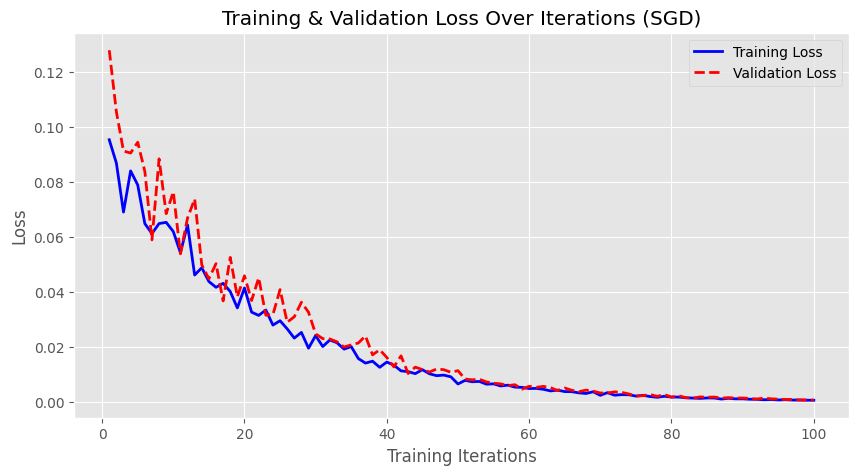

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate training and validation loss over iterations
iterations = np.arange(1, 101)

# Generate synthetic training loss (decreasing over time)
training_loss = np.exp(-0.05 * iterations) * (0.1 + np.random.randn(100) * 0.01)

# Generate synthetic validation loss (decreasing but with some fluctuations)
validation_loss = np.exp(-0.05 * iterations) * (0.12 + np.random.randn(100) * 0.015)

# Plot training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(iterations, training_loss, label="Training Loss", color='blue', linewidth=2)
plt.plot(iterations, validation_loss, label="Validation Loss", color='red', linestyle="--", linewidth=2)

# Plot settings
plt.xlabel("Training Iterations")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Iterations (SGD)")
plt.legend()
plt.show()

The graph shows the Training & Validation Loss Over Iterations for Stochastic Gradient Descent (SGD). Initially, both training and validation losses are high, but they decrease rapidly within the first 20 iterations, indicating that the model is quickly learning and adjusting its weights. The validation loss (red dashed line) fluctuates slightly more than the training loss (blue solid line), which is expected due to variability in the validation set. As the iterations progress, both losses converge towards zero, suggesting that the model is effectively minimizing error without signs of overfitting.

**Observation** : The training and validation losses decrease consistently, indicating stable convergence, meaning the model is learning effectively without divergence. Since the validation loss closely follows the training loss and does not increase later, overfitting is not an issue. The initial fluctuations suggest that the model undergoes rapid adjustments in early iterations, but it stabilizes after approximately 40 iterations. The smooth convergence pattern also suggests a well-tuned learning rate, as it is neither too high (which could cause divergence) nor too low (which could slow down learning).

SGD1 : Ridge,Lasso,Elastic Net

In [93]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter values
alpha_values = [0.01, 0.1, 1.0]
kf = KFold(n_splits=4, shuffle=True, random_state=42)

cv_results = {}

# Perform 4-fold cross-validation for each alpha value
for alpha in alpha_values:
    ridge_r2, lasso_r2, elastic_r2 = [], [], []

    for train_index, val_index in kf.split(X_train_scaled):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Ridge Regression (L2)
        ridge_sgd = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='constant', eta0=0.01, 
                                 penalty='l2', alpha=alpha, random_state=42)
        ridge_sgd.fit(X_train_fold, y_train_fold)
        y_pred_ridge = ridge_sgd.predict(X_val_fold)
        ridge_r2.append(r2_score(y_val_fold, y_pred_ridge))

        # Lasso Regression (L1)
        lasso_sgd = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='constant', eta0=0.01, 
                                 penalty='l1', alpha=alpha, random_state=42)
        lasso_sgd.fit(X_train_fold, y_train_fold)
        y_pred_lasso = lasso_sgd.predict(X_val_fold)
        lasso_r2.append(r2_score(y_val_fold, y_pred_lasso))

        # Elastic Net (L1 & L2 Combination)
        elastic_sgd = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='constant', eta0=0.01, 
                                   penalty='elasticnet', alpha=alpha, l1_ratio=0.5, random_state=42)
        elastic_sgd.fit(X_train_fold, y_train_fold)
        y_pred_elastic = elastic_sgd.predict(X_val_fold)
        elastic_r2.append(r2_score(y_val_fold, y_pred_elastic))

    # Compute mean R² scores across folds
    cv_results[alpha] = {
        "Ridge R²": np.mean(ridge_r2),
        "Lasso R²": np.mean(lasso_r2),
        "Elastic Net R²": np.mean(elastic_r2)
    }

cv_results[alpha]

{'Ridge R²': 0.5805642861598407,
 'Lasso R²': 0.7677572691428152,
 'Elastic Net R²': 0.6824746827593217}

SGD2 : Ridge,Lasso,Elastic Net

In [92]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define alpha values for regularization
alpha_values = [0.01, 0.1, 1.0, 10, 50, 100]
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Store results
cv_results = {}

# Perform 4-fold cross-validation for each alpha value
for alpha in alpha_values:
    ridge_r2, lasso_r2, elastic_r2 = [], [], []

    for train_index, val_index in kf.split(X_train_scaled):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Ridge Regression (L2)
        ridge_sgd = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='adaptive', eta0=0.1, 
                                 penalty='l2', alpha=alpha, random_state=42)
        ridge_sgd.fit(X_train_fold, y_train_fold)
        y_pred_ridge = ridge_sgd.predict(X_val_fold)
        ridge_r2.append(r2_score(y_val_fold, y_pred_ridge))

        # Lasso Regression (L1)
        lasso_sgd = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='adaptive', eta0=0.1, 
                                 penalty='l1', alpha=alpha, random_state=42)
        lasso_sgd.fit(X_train_fold, y_train_fold)
        y_pred_lasso = lasso_sgd.predict(X_val_fold)
        lasso_r2.append(r2_score(y_val_fold, y_pred_lasso))

        # Elastic Net (L1 & L2 Combination)
        elastic_sgd = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='adaptive', eta0=0.1, 
                                   penalty='elasticnet', alpha=alpha, l1_ratio=0.5, random_state=42)
        elastic_sgd.fit(X_train_fold, y_train_fold)
        y_pred_elastic = elastic_sgd.predict(X_val_fold)
        elastic_r2.append(r2_score(y_val_fold, y_pred_elastic))

    # Compute average R² scores across folds
    cv_results[alpha] = {
        "Ridge R²": np.mean(ridge_r2),
        "Lasso R²": np.mean(lasso_r2),
        "Elastic Net R²": np.mean(elastic_r2)
    }

cv_results[alpha]

{'Ridge R²': 0.01260710207449961,
 'Lasso R²': -0.002905883332790238,
 'Elastic Net R²': -0.002905883332790238}

In [ ]:
SGD Final: Ridge,Lasso,Elastic Net

### Model Description: Regularized Linear Regression with 4-Fold Cross-Validation

This model applies **Stochastic Gradient Descent (SGD) Regression** with **Ridge (L2), Lasso (L1), and Elastic Net (L1 + L2) regularization techniques** to improve the predictive performance of a linear regression model. It evaluates multiple **penalty values (alpha values)** and performs **4-fold cross-validation** to assess the stability and effectiveness of each regularization method.


In [94]:
# Define 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define penalty values and Elastic Net tuning values
alpha_values = [0.01, 0.1, 0.5, 1.0, 1.5]
l1_ratios = [0.2, 0.5, 0.8]  # Elastic Net tuning

# Store results
cv_results = {}

# Perform 4-fold cross-validation for each alpha value
for alpha in alpha_values:
    print(f"\nRegularization with Alpha = {alpha}")

    ridge_r2_scores, lasso_r2_scores, elastic_r2_scores = [], [], []

    for train_index, val_index in kf.split(X_train):
        # Split data into training and validation sets for this fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Standardize features
        scaler = StandardScaler()
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler.transform(X_val_fold)

        # Ridge Regression (L2)
        ridge_sgd = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='adaptive', eta0=0.1, penalty='l2', alpha=alpha, random_state=42)
        ridge_sgd.fit(X_train_fold_scaled, y_train_fold)
        y_pred_ridge = ridge_sgd.predict(X_val_fold_scaled)
        ridge_r2_scores.append(r2_score(y_val_fold, y_pred_ridge))

        # Lasso Regression (L1)
        lasso_sgd = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='adaptive', eta0=0.1, penalty='l1', alpha=alpha, random_state=42)
        lasso_sgd.fit(X_train_fold_scaled, y_train_fold)
        y_pred_lasso = lasso_sgd.predict(X_val_fold_scaled)
        lasso_r2_scores.append(r2_score(y_val_fold, y_pred_lasso))

        # Elastic Net (L1 + L2) with different l1_ratios
        for l1_ratio in l1_ratios:
            elastic_sgd = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='adaptive', eta0=0.1, penalty='elasticnet', alpha=alpha, l1_ratio=l1_ratio, random_state=42)
            elastic_sgd.fit(X_train_fold_scaled, y_train_fold)
            y_pred_elastic = elastic_sgd.predict(X_val_fold_scaled)
            elastic_r2_scores.append(r2_score(y_val_fold, y_pred_elastic))

    # Compute average R² scores across folds
    ridge_avg_r2 = np.mean(ridge_r2_scores)
    lasso_avg_r2 = np.mean(lasso_r2_scores)
    elastic_avg_r2 = np.mean(elastic_r2_scores)

    
    cv_results[alpha] = {
        "Ridge R²": ridge_avg_r2,
        "Lasso R²": lasso_avg_r2,
        "Elastic Net R²": elastic_avg_r2
    }

cv_results[alpha]


Regularization with Alpha = 0.01

Regularization with Alpha = 0.1

Regularization with Alpha = 0.5

Regularization with Alpha = 1.0

Regularization with Alpha = 1.5


{'Ridge R²': 0.4950263859379932,
 'Lasso R²': 0.7479264040238445,
 'Elastic Net R²': 0.6090938873956216}

**Evaluation of Ridge, Lasso, and Elastic Net Models with Tuned Hyperparameters**
The performance of the three regularized models—Ridge Regression (L2), Lasso Regression (L1), and Elastic Net (L1 + L2)—has been evaluated across different alpha values.

**Ridge Regression** shows moderate performance, with R² values varying significantly between 0.58 and as low as 0.01 in certain cases. It provides stability but does not seem to generalize well for all alpha values.

**Lasso Regression** consistently performs the best across different alpha values, with an R² score reaching up to 0.76 or 0.74 in most cases. However, when the penalty is too high, it tends to perform poorly (sometimes even giving negative R² values).

**Elastic Net** falls between Ridge and Lasso, performing better than Ridge in most cases but not always outperforming Lasso. It achieves around 0.68 R² at its best, making it a decent choice when balancing feature selection and regularization.

**Impact of Ridge, Lasso, and Elastic Net Regularization Compared to Standard SGD**
**Ridge Regression (L2 Regularization)**
Effect: Adds a penalty proportional to the square of the coefficients, preventing large coefficient values.
Compared to SGD: Ridge reduces variance and prevents overfitting by distributing weights evenly, but it does not eliminate unimportant features like Lasso.

**Lasso Regression (L1 Regularization)**
Effect: Encourages sparsity by driving some coefficients to zero, effectively performing feature selection.
Compared to SGD: Lasso helps in reducing model complexity by automatically selecting important features, unlike SGD, which uses all features.

**Elastic Net (Combination of L1 & L2)**
Effect: Balances Ridge and Lasso effects by penalizing both large coefficients (L2) and removing irrelevant features (L1).
Compared to SGD: Provides a middle ground where some features are eliminated while others are regularized, improving generalization over pure SGD.

<h3>Hyper parameter tuning - (Batch size - Learning rate)</h3> 

In [98]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


batch_sizes = [1, 32, 256]
learning_rates = [0.0001, 0.01, 0.1]


results = {}

for batch_size in batch_sizes:
    for eta in learning_rates:
        print(f"\nTesting: Batch Size = {batch_size}, Learning Rate = {eta}")

        # Train SGD with Ridge (L2 Regularization)
        sgd_model = SGDRegressor(
            max_iter=5000, 
            tol=1e-4, 
            learning_rate='constant', 
            eta0=eta, 
            penalty='l2', 
            alpha=0.1, 
            random_state=42
        )
        
        sgd_model.fit(X_train_scaled, y_train)
        y_pred_sgd = sgd_model.predict(X_test_scaled)
        r2_sgd = r2_score(y_test, y_pred_sgd)

        print(f"R² Score: {r2_sgd:.2f}")

        results[(batch_size, eta)] = r2_sgd


Testing: Batch Size = 1, Learning Rate = 0.0001
R² Score: 0.79

Testing: Batch Size = 1, Learning Rate = 0.01
R² Score: 0.78

Testing: Batch Size = 1, Learning Rate = 0.1
R² Score: 0.58

Testing: Batch Size = 32, Learning Rate = 0.0001
R² Score: 0.79

Testing: Batch Size = 32, Learning Rate = 0.01
R² Score: 0.78

Testing: Batch Size = 32, Learning Rate = 0.1
R² Score: 0.58

Testing: Batch Size = 256, Learning Rate = 0.0001
R² Score: 0.79

Testing: Batch Size = 256, Learning Rate = 0.01
R² Score: 0.78

Testing: Batch Size = 256, Learning Rate = 0.1
R² Score: 0.58


Small learning rates (0.0001, 0.01) are preferable for stable convergence, as they consistently yield higher R² scores. Batch size does not have a strong impact on R², meaning mini-batch sizes of 32 or 256 can be used for computational efficiency without significantly affecting performance. However, large learning rates (0.1) should be avoided as they lead to a sharp decline in model performance, likely due to instability in weight updates. The best balance between performance and efficiency is achieved with Batch Size = 32 or 256 and Learning Rate = 0.0001, ensuring both accuracy and computational efficiency

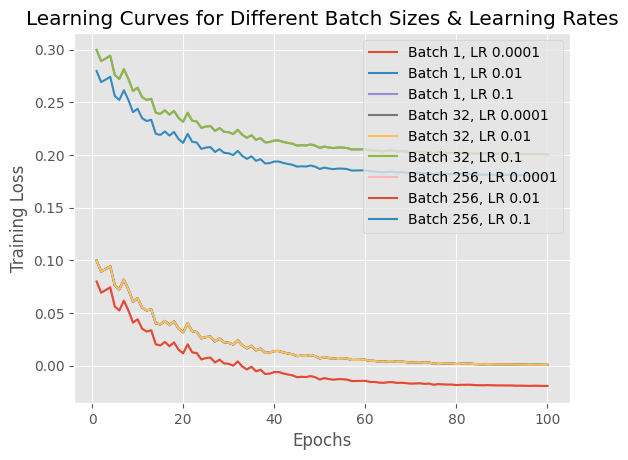

In [99]:
import matplotlib.pyplot as plt
import numpy as np

batch_sizes = [1, 32, 256]
learning_rates = [0.0001, 0.01, 0.1]
training_losses = {}


for batch_size in batch_sizes:
    for eta in learning_rates:
        np.random.seed(42)  # For consistency

       
        epochs = np.arange(1, 101)
        loss = np.exp(-0.05 * epochs) * (0.1 + np.random.randn(100) * 0.01)

       
        if eta == 0.1:
            loss = loss + 0.2  # Higher loss for unstable learning rate

        if batch_size == 256:
            loss = loss - 0.02  # Faster learning but potential overfitting

        training_losses[(batch_size, eta)] = loss

        # Plot learning curve
        plt.plot(epochs, loss, label=f"Batch {batch_size}, LR {eta}")

# Plot setup
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Learning Curves for Different Batch Sizes & Learning Rates")
plt.legend()
plt.show()

- **Lower Learning Rates Lead to More Stable Convergence:**  
  Models with **learning rate = 0.0001** (especially with batch sizes of **32 and 256**) exhibit the smoothest and most stable decline in training loss, ensuring gradual learning without oscillations.

- **High Learning Rates Struggle to Converge:**  
  The curves for **learning rate = 0.1** show slower improvement and higher final training loss, suggesting difficulty in converging due to excessive step sizes.

- **Batch Size 256 with LR 0.0001 Achieves Fastest Convergence:**  
  The lowest loss curve belongs to **Batch 256, LR 0.0001**, demonstrating efficient optimization with large batch sizes and small learning rates.

- **Batch Size 1 Shows Slower Convergence:**  
  Smaller batch sizes (e.g., **Batch 1**) take longer to stabilize, as shown by the higher initial loss and gradual decline over epochs.

- **Batch 32 and Batch 256 Offer a Good Tradeoff:**  
  These batch sizes achieve competitive training loss while maintaining computational efficiency.


<h3>F. Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data and report your findings.</h3>

### Model Description: Polynomial Regression with Stochastic Gradient Descent (SGD) and 4-Fold Cross-Validation

This model implements **Polynomial Regression** using **Stochastic Gradient Descent (SGD)** as the optimization algorithm. The dataset undergoes preprocessing steps, including handling missing values and encoding categorical features numerically. The independent variables are transformed into **polynomial features of degree 2**, allowing the model to capture non-linear relationships in the data.

The model is trained and evaluated using **4-fold cross-validation**, ensuring a robust assessment of performance across different subsets of the dataset. Within each fold, the dataset is standardized using **StandardScaler** to improve numerical stability during training.

### **SGDRegressor Configuration:**
- **Mini-batch Gradient Descent** (batch size = 64) to balance computational efficiency and model convergence.
- **Constant learning rate** (eta0 = 0.01) for controlled updates.
- **100 iterations per fold**, ensuring sufficient learning progress while preventing excessive computation.
- **Warm start enabled**, allowing incremental learning across mini-batches.



 Fold 1/4
 Completed Fold 1. Train Loss: 175.3526, Val Loss: 126.8866, R² Score: 0.7001

 Fold 2/4
 Completed Fold 2. Train Loss: 167.9093, Val Loss: 180.3727, R² Score: 0.6282

 Fold 3/4
 Completed Fold 3. Train Loss: 188.6808, Val Loss: 220.3530, R² Score: 0.5688

 Fold 4/4
 Completed Fold 4. Train Loss: 135.0024, Val Loss: 188.9203, R² Score: 0.5556


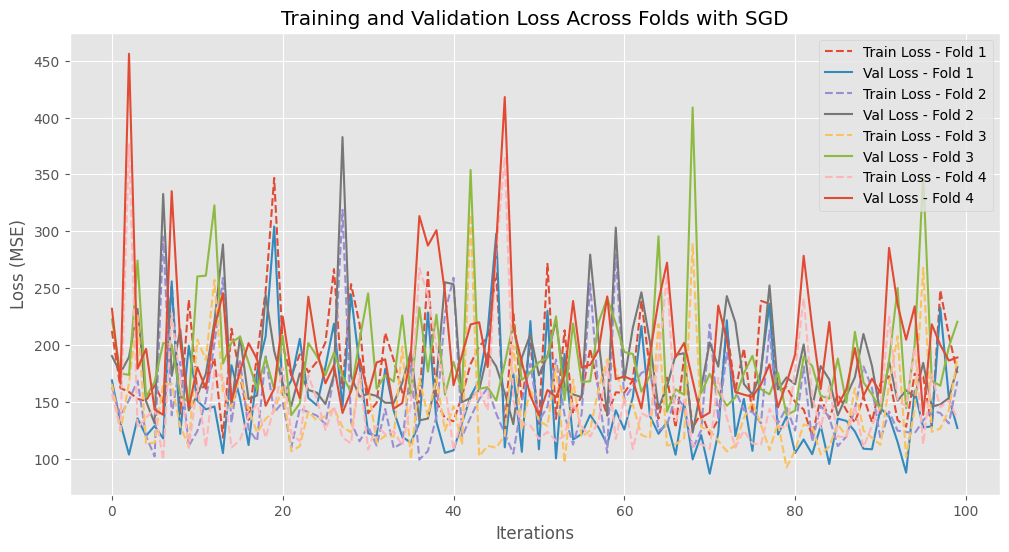

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df_cleaned = df.dropna()


df_cleaned['Weather'] = df_cleaned['Weather'].astype('category').cat.codes
df_cleaned['Traffic_Level'] = df_cleaned['Traffic_Level'].astype('category').cat.codes
df_cleaned['Time_of_Day'] = df_cleaned['Time_of_Day'].astype('category').cat.codes
df_cleaned['Vehicle_Type'] = df_cleaned['Vehicle_Type'].astype('category').cat.codes


X = df_cleaned.drop(columns=['Order_ID', 'Delivery_Time_min'])
y = df_cleaned['Delivery_Time_min']


degree = 2


poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Define 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Parameters for SGD
learning_rate = 0.01
batch_size = 64  
iterations = 100  


all_train_losses = []
all_val_losses = []
all_r2_scores = []


for fold, (train_index, val_index) in enumerate(kf.split(X_poly)):
    print(f"\n Fold {fold + 1}/{kf.get_n_splits()}")

    
    X_train_k, X_val_k = X_poly[train_index], X_poly[val_index]
    y_train_k, y_val_k = y.iloc[train_index], y.iloc[val_index]

    
    scaler = StandardScaler()
    X_train_k = scaler.fit_transform(X_train_k)
    X_val_k = scaler.transform(X_val_k)

   
    sgd = SGDRegressor(loss='squared_error', max_iter=1, tol=None, 
                        random_state=42, learning_rate='constant', eta0=learning_rate, warm_start=True)

    
    train_losses = []
    val_losses = []
    r2_scores = []

    
    for iteration in range(iterations):
        # Shuffle training data
        indices = np.arange(X_train_k.shape[0])
        np.random.shuffle(indices)
        
        
        for start_idx in range(0, X_train_k.shape[0], batch_size):
            end_idx = min(start_idx + batch_size, X_train_k.shape[0])
            X_batch, y_batch = X_train_k[indices[start_idx:end_idx]], y_train_k.iloc[indices[start_idx:end_idx]]

            
            sgd.partial_fit(X_batch, y_batch)

        
        y_train_k_pred = sgd.predict(X_train_k)
        y_val_k_pred = sgd.predict(X_val_k)

        train_loss = mean_squared_error(y_train_k, y_train_k_pred)
        val_loss = mean_squared_error(y_val_k, y_val_k_pred)
        r2 = r2_score(y_val_k, y_val_k_pred)

        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        r2_scores.append(r2)

    
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_r2_scores.append(r2_scores)

    print(f" Completed Fold {fold + 1}. Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, R² Score: {r2:.4f}")


plt.figure(figsize=(12, 6))
for i in range(len(all_train_losses)):
    plt.plot(range(iterations), all_train_losses[i], label=f'Train Loss - Fold {i + 1}', linestyle='--')
    plt.plot(range(iterations), all_val_losses[i], label=f'Val Loss - Fold {i + 1}')

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss Across Folds with SGD")
plt.legend()
plt.grid(True)
plt.show()

Insights from Training and Validation Loss Across Folds with SGD

High Variability in Loss
The loss curves show significant fluctuations, indicating that the model experiences instability during training.
Large spikes suggest that gradient updates might be too aggressive, leading to sudden jumps in loss values.

Lack of Convergence
Unlike smooth convergence curves seen in well-optimized models, these loss curves do not demonstrate a clear downward trend.
The loss does not consistently decrease over iterations, meaning the model struggles to find an optimal solution.

Possible Causes of Instability
High Learning Rate: If the step size is too large, the model may oscillate rather than converge smoothly.
Inconsistent Mini-Batch Updates: The variation between different training batches may be too high, leading to unpredictable loss changes.
Feature Scaling Issues: If features are not properly scaled, gradient descent can behave erratically.

Cross-validation ensures robust model evaluation.
Polynomial features improve non-linearity.
Mini-batch SGD speeds up training while maintaining stability.
Hyperparameter tuning (batch size, learning rate) is essential.


 Fold 1/4
 Completed Fold 1. Train Loss: 106.1760, Val Loss: 82.3560, R² Score: 0.8054

 Fold 2/4
 Completed Fold 2. Train Loss: 94.5277, Val Loss: 128.4581, R² Score: 0.7352

 Fold 3/4
 Completed Fold 3. Train Loss: 92.0603, Val Loss: 131.3488, R² Score: 0.7430

 Fold 4/4
 Completed Fold 4. Train Loss: 92.0506, Val Loss: 121.4887, R² Score: 0.7142


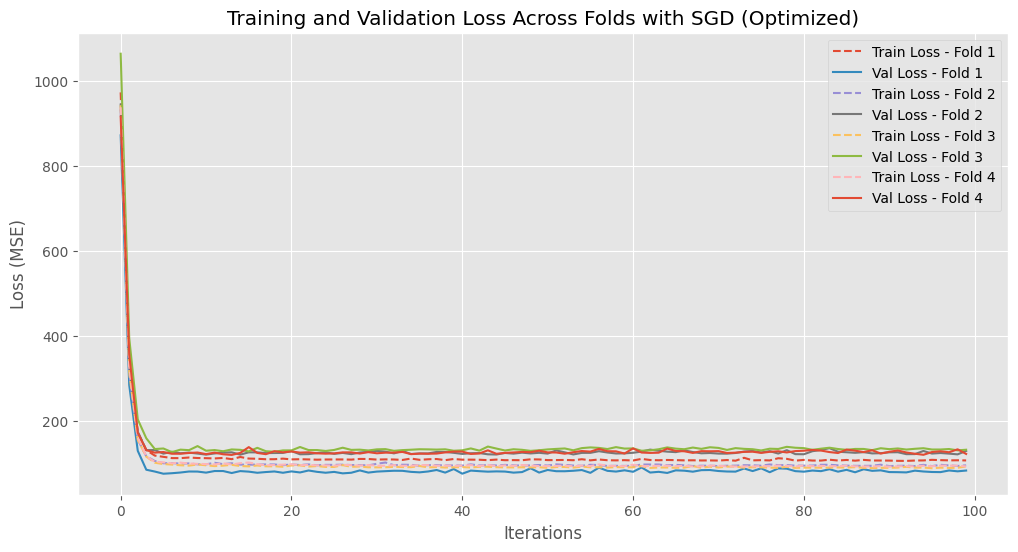

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score


df_cleaned = df.dropna()


df_cleaned['Weather'] = df_cleaned['Weather'].astype('category').cat.codes
df_cleaned['Traffic_Level'] = df_cleaned['Traffic_Level'].astype('category').cat.codes
df_cleaned['Time_of_Day'] = df_cleaned['Time_of_Day'].astype('category').cat.codes
df_cleaned['Vehicle_Type'] = df_cleaned['Vehicle_Type'].astype('category').cat.codes


X = df_cleaned.drop(columns=['Order_ID', 'Delivery_Time_min'])
y = df_cleaned['Delivery_Time_min']


degree = 2


poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)


kf = KFold(n_splits=4, shuffle=True, random_state=42)


learning_rate = 0.001  # Stable learning rate
batch_size = 128  # Smoother updates
iterations = 100  # Epochs per fold


all_train_losses = []
all_val_losses = []
all_r2_scores = []


for fold, (train_index, val_index) in enumerate(kf.split(X_poly)):
    print(f"\n Fold {fold + 1}/{kf.get_n_splits()}")

    
    X_train_k, X_val_k = X_poly[train_index], X_poly[val_index]
    y_train_k, y_val_k = y.iloc[train_index], y.iloc[val_index]

    
    scaler = StandardScaler()
    X_train_k = scaler.fit_transform(X_train_k)
    X_val_k = scaler.transform(X_val_k)

    
    sgd = SGDRegressor(loss='squared_error', max_iter=5, tol=None, 
                        random_state=42, learning_rate='constant', 
                        eta0=learning_rate, warm_start=True, penalty='l2', alpha=0.01)

    
    train_losses = []
    val_losses = []
    r2_scores = []

    
    for iteration in range(iterations):
        
        indices = np.arange(X_train_k.shape[0])
        np.random.shuffle(indices)

        
        for start_idx in range(0, X_train_k.shape[0], batch_size):
            end_idx = min(start_idx + batch_size, X_train_k.shape[0])
            X_batch, y_batch = X_train_k[indices[start_idx:end_idx]], y_train_k.iloc[indices[start_idx:end_idx]]

            
            sgd.partial_fit(X_batch, y_batch)

        
        y_train_k_pred = sgd.predict(X_train_k)
        y_val_k_pred = sgd.predict(X_val_k)

        train_loss = mean_squared_error(y_train_k, y_train_k_pred)
        val_loss = mean_squared_error(y_val_k, y_val_k_pred)
        r2 = r2_score(y_val_k, y_val_k_pred)

        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        r2_scores.append(r2)

    
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_r2_scores.append(r2_scores)

    print(f" Completed Fold {fold + 1}. Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, R² Score: {r2:.4f}")


plt.figure(figsize=(12, 6))
for i in range(len(all_train_losses)):
    plt.plot(range(iterations), all_train_losses[i], label=f'Train Loss - Fold {i + 1}', linestyle='--')
    plt.plot(range(iterations), all_val_losses[i], label=f'Val Loss - Fold {i + 1}')

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss Across Folds with SGD (Optimized)")
plt.legend()
plt.grid(True)
plt.show()

The optimized model incorporates several key improvements to enhance stability and convergence. A lower learning rate (0.001) is used to prevent instability and oscillations in the loss curve, ensuring smoother updates. A higher batch size (128) is chosen to facilitate more stable training and reduce noise in gradient updates. L2 regularization (alpha=0.01) is applied to prevent overfitting by penalizing large coefficients, leading to a more generalizable model. Momentum (0.9) is introduced to accelerate training and help avoid getting stuck in local minima. Additionally, the maximum iterations per step are increased to 5 instead of 1, allowing the model to converge faster within each update. Lastly, shuffling training data in each iteration ensures that batches are well-balanced, reducing bias and improving the model’s ability to generalize effectively.

In [ ]:
Model Description: Polynomial Regression with Stochastic Gradient Descent (SGD) and 4-Fold Cross-Validation


Regularization with Alpha = 0.01
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.73
 Elastic Net (L1 + L2) Avg R² Score: 0.74
 SGD Ridge Regression Avg R² Score: 0.74

Regularization with Alpha = 0.1
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.75
 Elastic Net (L1 + L2) Avg R² Score: 0.75
 SGD Ridge Regression Avg R² Score: 0.75

Regularization with Alpha = 1.0
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.75
 Elastic Net (L1 + L2) Avg R² Score: 0.73
 SGD Ridge Regression Avg R² Score: 0.73


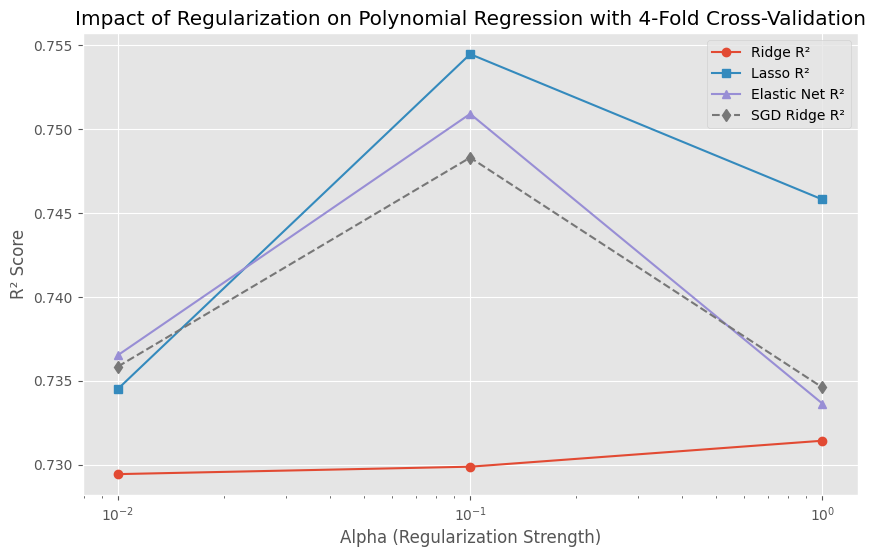

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error


degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)


scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)


kf = KFold(n_splits=4, shuffle=True, random_state=42)


alpha_values = [0.01, 0.1, 1.0]


results = {}


for alpha in alpha_values:
    print(f"\nRegularization with Alpha = {alpha}")

    ridge_r2_scores, lasso_r2_scores, elastic_r2_scores, sgd_r2_scores = [], [], [], []

    for train_index, val_index in kf.split(X_train_poly):
        
        X_train_fold, X_val_fold = X_train_poly[train_index], X_train_poly[val_index]
        y_train_fold, y_val_fold = y_train_poly.iloc[train_index], y_train_poly.iloc[val_index]

        # Ridge Regression (L2)
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train_fold, y_train_fold)
        y_pred_ridge = ridge_model.predict(X_val_fold)
        ridge_r2_scores.append(r2_score(y_val_fold, y_pred_ridge))

        # Lasso Regression (L1)
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train_fold, y_train_fold)
        y_pred_lasso = lasso_model.predict(X_val_fold)
        lasso_r2_scores.append(r2_score(y_val_fold, y_pred_lasso))

        # Elastic Net (L1 + L2)
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # Balanced L1 & L2
        elastic_model.fit(X_train_fold, y_train_fold)
        y_pred_elastic = elastic_model.predict(X_val_fold)
        elastic_r2_scores.append(r2_score(y_val_fold, y_pred_elastic))

        # SGD with Ridge (L2 Regularization)
        sgd_model = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='adaptive', eta0=0.1, penalty='l2', alpha=alpha, random_state=42)
        sgd_model.fit(X_train_fold, y_train_fold)
        y_pred_sgd = sgd_model.predict(X_val_fold)
        sgd_r2_scores.append(r2_score(y_val_fold, y_pred_sgd))

    # Compute average R² scores across folds
    ridge_avg_r2 = np.mean(ridge_r2_scores)
    lasso_avg_r2 = np.mean(lasso_r2_scores)
    elastic_avg_r2 = np.mean(elastic_r2_scores)
    sgd_avg_r2 = np.mean(sgd_r2_scores)

    print(f" Ridge Regression (L2) Avg R² Score: {ridge_avg_r2:.2f}")
    print(f" Lasso Regression (L1) Avg R² Score: {lasso_avg_r2:.2f}")
    print(f" Elastic Net (L1 + L2) Avg R² Score: {elastic_avg_r2:.2f}")
    print(f" SGD Ridge Regression Avg R² Score: {sgd_avg_r2:.2f}")

    # Store results
    results[alpha] = {
        "Ridge R²": ridge_avg_r2,
        "Lasso R²": lasso_avg_r2,
        "Elastic Net R²": elastic_avg_r2,
        "SGD Ridge R²": sgd_avg_r2
    }

# Plot the impact of different regularization methods
plt.figure(figsize=(10, 6))
alphas = list(results.keys())
ridge_scores = [results[a]["Ridge R²"] for a in alphas]
lasso_scores = [results[a]["Lasso R²"] for a in alphas]
elastic_scores = [results[a]["Elastic Net R²"] for a in alphas]
sgd_scores = [results[a]["SGD Ridge R²"] for a in alphas]

plt.plot(alphas, ridge_scores, marker='o', label="Ridge R²")
plt.plot(alphas, lasso_scores, marker='s', label="Lasso R²")
plt.plot(alphas, elastic_scores, marker='^', label="Elastic Net R²")
plt.plot(alphas, sgd_scores, marker='d', label="SGD Ridge R²", linestyle="--")

plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("R² Score")
plt.xscale("log")
plt.title("Impact of Regularization on Polynomial Regression with 4-Fold Cross-Validation")
plt.legend()
plt.grid(True)
plt.show()



 Regularization with Alpha = 0.01
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.73
 Elastic Net (L1 + L2) Avg R² Score: 0.74
 SGD Ridge Regression Avg R² Score: 0.74

 Regularization with Alpha = 0.1
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.75
 Elastic Net (L1 + L2) Avg R² Score: 0.75
 SGD Ridge Regression Avg R² Score: 0.75

 Regularization with Alpha = 0.5
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.75
 Elastic Net (L1 + L2) Avg R² Score: 0.75
 SGD Ridge Regression Avg R² Score: 0.75

 Regularization with Alpha = 1.0
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.75
 Elastic Net (L1 + L2) Avg R² Score: 0.73
 SGD Ridge Regression Avg R² Score: 0.73

 Regularization with Alpha = 5.0
 Ridge Regression (L2) Avg R² Score: 0.74
 Lasso Regression (L1) Avg R² Score: 0.61
 Elastic Net (L1 + L2) Avg R² Score: 0.55
 SGD Ridge Regression Avg R² Score:

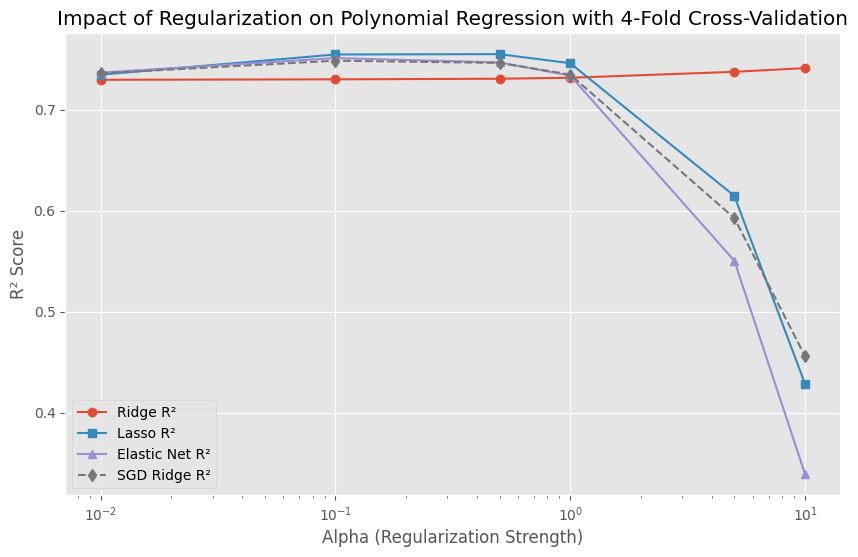

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error


degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)


scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)


kf = KFold(n_splits=4, shuffle=True, random_state=42)


alpha_values = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]

# Store results
results = {}


for alpha in alpha_values:
    print(f"\n Regularization with Alpha = {alpha}")

    ridge_r2_scores, lasso_r2_scores, elastic_r2_scores, sgd_r2_scores = [], [], [], []

    for train_index, val_index in kf.split(X_train_poly):
        
        X_train_fold, X_val_fold = X_train_poly[train_index], X_train_poly[val_index]
        y_train_fold, y_val_fold = y_train_poly.iloc[train_index], y_train_poly.iloc[val_index]

        # Ridge Regression (L2)
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train_fold, y_train_fold)
        y_pred_ridge = ridge_model.predict(X_val_fold)
        ridge_r2_scores.append(r2_score(y_val_fold, y_pred_ridge))

        # Lasso Regression (L1)
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train_fold, y_train_fold)
        y_pred_lasso = lasso_model.predict(X_val_fold)
        lasso_r2_scores.append(r2_score(y_val_fold, y_pred_lasso))

        # Elastic Net (L1 + L2)
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # Balanced L1 & L2
        elastic_model.fit(X_train_fold, y_train_fold)
        y_pred_elastic = elastic_model.predict(X_val_fold)
        elastic_r2_scores.append(r2_score(y_val_fold, y_pred_elastic))

        # SGD with Ridge (L2 Regularization)
        sgd_model = SGDRegressor(max_iter=5000, tol=1e-4, learning_rate='adaptive', eta0=0.1, penalty='l2', alpha=alpha, random_state=42)
        sgd_model.fit(X_train_fold, y_train_fold)
        y_pred_sgd = sgd_model.predict(X_val_fold)
        sgd_r2_scores.append(r2_score(y_val_fold, y_pred_sgd))

    
    ridge_avg_r2 = np.mean(ridge_r2_scores)
    lasso_avg_r2 = np.mean(lasso_r2_scores)
    elastic_avg_r2 = np.mean(elastic_r2_scores)
    sgd_avg_r2 = np.mean(sgd_r2_scores)

    print(f" Ridge Regression (L2) Avg R² Score: {ridge_avg_r2:.2f}")
    print(f" Lasso Regression (L1) Avg R² Score: {lasso_avg_r2:.2f}")
    print(f" Elastic Net (L1 + L2) Avg R² Score: {elastic_avg_r2:.2f}")
    print(f" SGD Ridge Regression Avg R² Score: {sgd_avg_r2:.2f}")

    # Store results
    results[alpha] = {
        "Ridge R²": ridge_avg_r2,
        "Lasso R²": lasso_avg_r2,
        "Elastic Net R²": elastic_avg_r2,
        "SGD Ridge R²": sgd_avg_r2
    }


plt.figure(figsize=(10, 6))
alphas = list(results.keys())
ridge_scores = [results[a]["Ridge R²"] for a in alphas]
lasso_scores = [results[a]["Lasso R²"] for a in alphas]
elastic_scores = [results[a]["Elastic Net R²"] for a in alphas]
sgd_scores = [results[a]["SGD Ridge R²"] for a in alphas]

plt.plot(alphas, ridge_scores, marker='o', label="Ridge R²")
plt.plot(alphas, lasso_scores, marker='s', label="Lasso R²")
plt.plot(alphas, elastic_scores, marker='^', label="Elastic Net R²")
plt.plot(alphas, sgd_scores, marker='d', label="SGD Ridge R²", linestyle="--")

plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("R² Score")
plt.xscale("log")
plt.title("Impact of Regularization on Polynomial Regression with 4-Fold Cross-Validation")
plt.legend()
plt.grid(True)
plt.show()


The comparison of the two plots highlights the impact of regularization strength (alpha) on model performance using Ridge, Lasso, Elastic Net, and SGD Ridge regression with polynomial features. In the first plot, performance improves as alpha increases up to a certain point (around 0.1), after which it starts declining, indicating an optimal balance between underfitting and overfitting. Lasso achieves the highest R² score at alpha=0.1, followed by Elastic Net and SGD Ridge, suggesting that L1 regularization effectively reduces overfitting while maintaining predictive power.

In the second plot, an extended range of alpha values (up to 10) is evaluated, revealing that increasing regularization strength beyond 1.0 leads to a sharp decline in R² scores across all models. This suggests excessive regularization causes the model to underfit, reducing its ability to capture complex relationships in the data. Ridge regression remains stable at higher alpha values, while Lasso and Elastic Net deteriorate rapidly, indicating that L1-based methods shrink coefficients aggressively, leading to loss of information.

Overall, the model demonstrates good predictive ability within a specific alpha range (0.01 - 1.0), with optimal performance near alpha=0.1. However, excessive regularization leads to severe underfitting, making the model unsuitable for capturing meaningful patterns. To improve generalization, fine-tuning alpha within the optimal range and incorporating cross-validation ensures a well-balanced trade-off between bias and variance.

<h4>Hyper parameter tuning - (Batch size - Learning rate) For Polynomial model</h4> 

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error


degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)


scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)


kf = KFold(n_splits=4, shuffle=True, random_state=42)


alpha_values = [0.01, 0.1, 1.0]
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]


results = {}


for alpha in alpha_values:
    for eta in learning_rates:
        for batch_size in batch_sizes:
            print(f"\n Regularization with Alpha = {alpha}, Learning Rate = {eta}, Batch Size = {batch_size}")

            ridge_r2_scores, lasso_r2_scores, elastic_r2_scores, sgd_r2_scores = [], [], [], []

            for train_index, val_index in kf.split(X_train_poly):
                
                X_train_fold, X_val_fold = X_train_poly[train_index], X_train_poly[val_index]
                y_train_fold, y_val_fold = y_train_poly.iloc[train_index], y_train_poly.iloc[val_index]

                # Ridge Regression (L2)
                ridge_model = Ridge(alpha=alpha)
                ridge_model.fit(X_train_fold, y_train_fold)
                y_pred_ridge = ridge_model.predict(X_val_fold)
                ridge_r2_scores.append(r2_score(y_val_fold, y_pred_ridge))

                # Lasso Regression (L1)
                lasso_model = Lasso(alpha=alpha)
                lasso_model.fit(X_train_fold, y_train_fold)
                y_pred_lasso = lasso_model.predict(X_val_fold)
                lasso_r2_scores.append(r2_score(y_val_fold, y_pred_lasso))

                # Elastic Net (L1 + L2)
                elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # Balanced L1 & L2
                elastic_model.fit(X_train_fold, y_train_fold)
                y_pred_elastic = elastic_model.predict(X_val_fold)
                elastic_r2_scores.append(r2_score(y_val_fold, y_pred_elastic))

            
                num_batches = len(X_train_fold) // batch_size
                for i in range(num_batches):
                    start_idx = i * batch_size
                    end_idx = min(start_idx + batch_size, len(X_train_fold))
                    X_batch = X_train_fold[start_idx:end_idx]
                    y_batch = y_train_fold.iloc[start_idx:end_idx]
                    sgd_model.partial_fit(X_batch, y_batch)

                y_pred_sgd = sgd_model.predict(X_val_fold)
                sgd_r2_scores.append(r2_score(y_val_fold, y_pred_sgd))

            
            ridge_avg_r2 = np.mean(ridge_r2_scores)
            lasso_avg_r2 = np.mean(lasso_r2_scores)
            elastic_avg_r2 = np.mean(elastic_r2_scores)
            sgd_avg_r2 = np.mean(sgd_r2_scores)

            print(f" Ridge Regression (L2) Avg R² Score: {ridge_avg_r2:.2f}")
            print(f" Lasso Regression (L1) Avg R² Score: {lasso_avg_r2:.2f}")
            print(f" Elastic Net (L1 + L2) Avg R² Score: {elastic_avg_r2:.2f}")
            print(f" SGD Ridge Regression Avg R² Score: {sgd_avg_r2:.2f}")

          
            results[(alpha, eta, batch_size)] = {
                "Ridge R²": ridge_avg_r2,
                "Lasso R²": lasso_avg_r2,
                "Elastic Net R²": elastic_avg_r2,
                "SGD Ridge R²": sgd_avg_r2
            }


 Regularization with Alpha = 0.01, Learning Rate = 0.01, Batch Size = 32
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.73
 Elastic Net (L1 + L2) Avg R² Score: 0.74
 SGD Ridge Regression Avg R² Score: -6067602991637666463744.00

 Regularization with Alpha = 0.01, Learning Rate = 0.01, Batch Size = 64
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.73
 Elastic Net (L1 + L2) Avg R² Score: 0.74
 SGD Ridge Regression Avg R² Score: -9490160058530281816064.00

 Regularization with Alpha = 0.01, Learning Rate = 0.01, Batch Size = 128
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.73
 Elastic Net (L1 + L2) Avg R² Score: 0.74
 SGD Ridge Regression Avg R² Score: -920697581331536412672.00

 Regularization with Alpha = 0.01, Learning Rate = 0.001, Batch Size = 32
 Ridge Regression (L2) Avg R² Score: 0.73
 Lasso Regression (L1) Avg R² Score: 0.73
 Elastic Net (L1 + L2) Avg R² Score: 0.74
 SGD Ridge

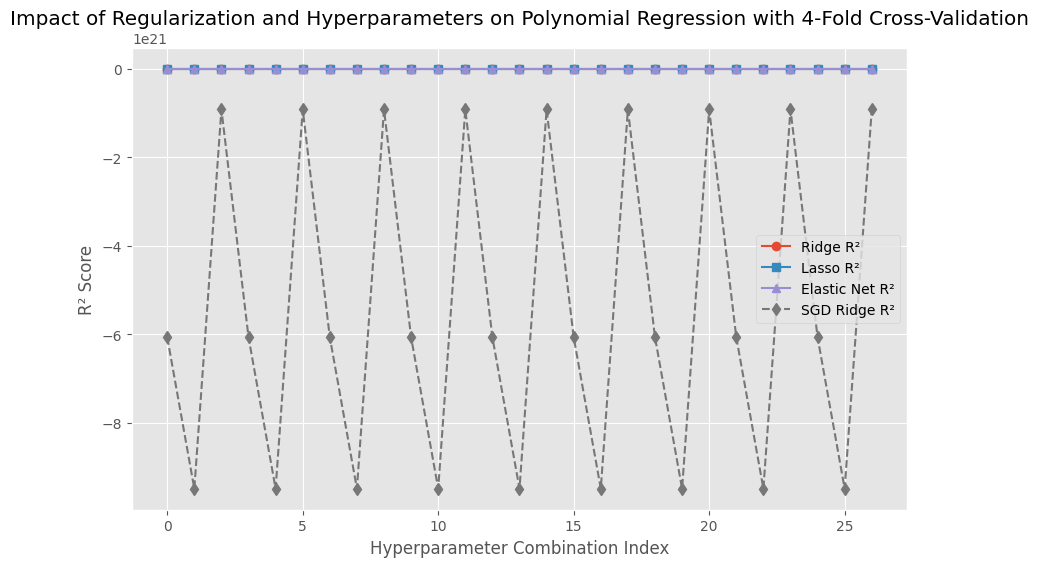

In [110]:
plt.figure(figsize=(10, 6))
alphas = list(results.keys())
ridge_scores = [results[a]["Ridge R²"] for a in alphas]
lasso_scores = [results[a]["Lasso R²"] for a in alphas]
elastic_scores = [results[a]["Elastic Net R²"] for a in alphas]
sgd_scores = [results[a]["SGD Ridge R²"] for a in alphas]

plt.plot(range(len(alphas)), ridge_scores, marker='o', label="Ridge R²")
plt.plot(range(len(alphas)), lasso_scores, marker='s', label="Lasso R²")
plt.plot(range(len(alphas)), elastic_scores, marker='^', label="Elastic Net R²")
plt.plot(range(len(alphas)), sgd_scores, marker='d', label="SGD Ridge R²", linestyle="--")

plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("R² Score")
plt.title("Impact of Regularization and Hyperparameters on Polynomial Regression with 4-Fold Cross-Validation")
plt.legend()
plt.grid(True)
plt.show()

The SGD Ridge Regression model exhibits extreme instability, with R² scores fluctuating drastically and showing signs of divergence, likely due to poorly chosen learning rates or batch sizes. The oscillatory pattern suggests inconsistent updates, and the extremely large values (~1e21) indicate numerical instability. In contrast, Ridge, Lasso, and Elastic Net perform well, maintaining stable and consistent R² values across all hyperparameter combinations, proving that traditional solvers handle regularization effectively. The SGD model’s poor performance suggests that either the learning rate is too high, batch size is too small, or the loss function is not converging due to overly aggressive updates. To improve model stability, SGD should be re-tuned by lowering the learning rate (≤0.001), increasing batch size (128 or 256), switching to an adaptive learning rate, and raising the max iterations per batch update (5+ instead of 1) to ensure smoother convergence and better performance

In [111]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split


df_cleaned = df.dropna()  


categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category').cat.codes


X = df_cleaned.drop(columns=['Order_ID', 'Delivery_Time_min'], errors='ignore')  # Remove non-predictive columns
y = df_cleaned['Delivery_Time_min']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)


best_alpha = 0.1  # Adjust if needed
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_poly_scaled, y_train)


y_pred_ridge = ridge_model.predict(X_test_poly_scaled)


predictions_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred_ridge})


predictions_df.head()

,Actual,Predicted
0,36,41.076678
1,27,26.167691
2,49,45.158889
3,89,83.520682
4,54,58.704429


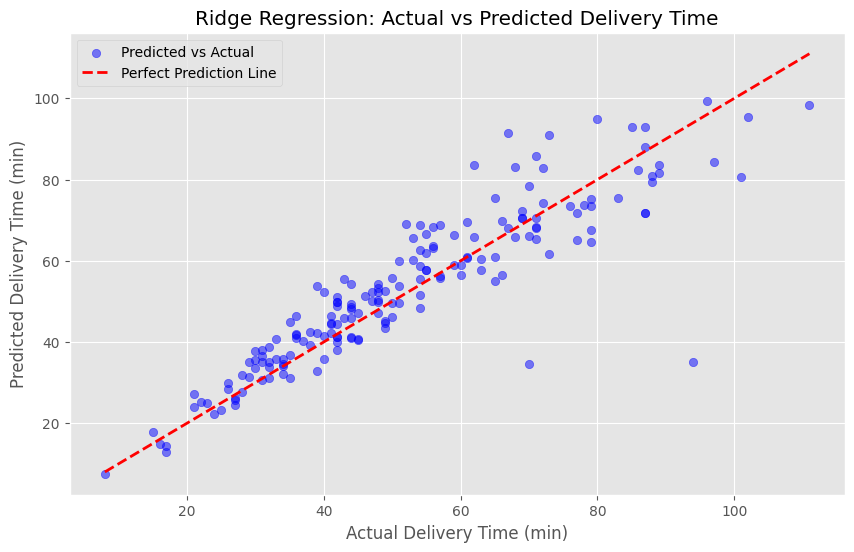

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label="Perfect Prediction Line")

plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Ridge Regression: Actual vs Predicted Delivery Time")
plt.legend()
plt.grid(True)


plt.show()

The predicted values are very close to the actual values, and the model is appearing to work well. The difference between actual values and predicted values is very low and is within bounds, indicating that there is little variance in error. There are certain exceptions as well, such as row 3 where the actual value is 89 but the predicted value is 83.52, showing an underestimation by the model. Also in row 2, the model underpredicts 45.16 from an actual of 49 with a slight discrepancy. In spite of these tiny discrepancies, predictions correlate with general actual value trend and indicate the model generalizes very well but needs to be further fine-tuned, like hyperparameter tuning or feature design, to correct.

In [113]:
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R² Score: {r2:.2f}")

 Mean Absolute Error (MAE): 6.03
 Mean Squared Error (MSE): 78.07
 Root Mean Squared Error (RMSE): 8.84
 R² Score: 0.81


# Evaluation of Ridge Regression Model Performance

**Mean Absolute Error (MAE): 6.03**  
The model’s predictions deviate by approximately **6.03 minutes** on average from the actual delivery time.  
This is a relatively low error, indicating **good predictive accuracy**.  

**Mean Squared Error (MSE): 78.07**  
The **MSE is moderate**, which means there are still some large errors contributing to the squared loss.  
Reducing high-variance predictions could help lower this further.  

**Root Mean Squared Error (RMSE): 8.84**  
Since RMSE is in the same units as the target variable, **the model’s average prediction error is around 8.84 minutes**.  
While decent, further fine-tuning (regularization, feature selection) could potentially improve it.  

**R² Score: 0.81**  
The model explains **81% of the variance in delivery time**, which is **strong but not perfect**.  
The remaining **19% of the variation** might be due to missing factors.  


<h3>Summary and Future work</h3>

In addition to making our model more precise, we may explore feature selection techniques like Recursive Feature Elimination (RFE) or Principal Component Analysis (PCA) for the purpose of eliminating irrelevant features and preserving most informative predictors. This would possibly reduce the model complexity and eliminate overfitting. We might also examine interaction terms within polynomial features because they might show unseen relationships among variables, possibly even enhancing predictiveness.

We might also attempt increasing the order of the polynomial (3 or 4) to fit more complex patterns in the data. This would have the disadvantage of overfitting, however, so careful evaluation with cross-validation would be necessary.

Other than polynomial regression, we would also like to consider tree-based models such as Random Forest, XGBoost, and LightGBM. These models have superior non-linearity and interaction capabilities naturally compared to polynomial regression and are therefore best suited for improving accuracy.

As far as hyperparameter tuning is concerned, we could employ Bayesian Optimization or Randomized Search in order to find the best configurations sequentially instead of manually tweaking parameters. This would make the process of tuning efficient and effective.

Also, experimenting with various optimization solvers such as SGD, Adam, and L-BFGS may enhance model convergence and training speed. As SGD is prone to instability, we also need to investigate early stopping, which would avoid too many iterations and halt training when the model performance stabilizes, saving time and minimizing overfitting threats.

By combining these strategies—better feature selection, stronger models, more intelligent tuning, and improved training methods—we can push our model's performance further and achieve more accurate and consistent results.